# A3_project_sts
# STS304 M형결함 vital few 도출 및 최적화를 통한 ZERO-DEFECT 화
# A3조 (*홍정택, 유창우, 이민성, 윤영채, 정주영, 허유진), *팀장
# ----------------------------------------------------------------------------------------

### <데이터 전처리>

In [61]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
if platform.system() == "Windows":
    rc('font', family='Malgun Gothic')
elif platform.system() == "Darwin":  # macOS
    rc('font', family='AppleGothic')
else:
    rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
os.chdir('/Users/Mr.HONG/Desktop/Data Set/A3_철강(STS강)')

# 데이터 불러오기
df_sts1 = pd.read_csv("sts_1sm_cc_1.csv")
df_sts2 = pd.read_csv("sts_2fur_hr_2.csv")
df_sts3 = pd.read_csv("sts_3ap_3.csv")

#df_sts1 에서 charge_id 랑 slab_no 를 묶어 중복값 확인
duplicates_df_sts1 = df_sts1[df_sts1.duplicated(subset=['charge_id', 'slab_no'], keep=False)]
# 결과 확인
print("--- df1의 중복 키 행 ---")
print(duplicates_df_sts1.sort_values(by=['charge_id', 'slab_no']))

--- df1의 중복 키 행 ---
     sm_plant charge_id steel_grade steel_usage  delta_ferrite  ingre_cr  \
13        1공장   CH80156         C13         RJ1             81     18.57   
14        1공장   CH80156         C13         RJ1             78     18.57   
238       1공장   CH80441         C13         RJ1             74     18.50   
239       1공장   CH80441         C13         RJ1             74     18.50   
1784      1공장   CH81002         C13         RJ1             69     18.27   
1785      1공장   CH81002         C13         RJ1             69     18.27   

      ingre_ni  ingre_s cast_date cc_gubun  tundish_temp  mlac_ratio  slab_no  \
13        8.24     0.02  07-13-24      2연주        1488.0        98.7      111   
14        8.24     0.02  07-13-24      2연주        1488.0        98.7      111   
238       8.27     0.06  07-30-24      2연주        1491.0        99.2      211   
239       8.27     0.06  07-30-24      2연주           NaN         0.0      211   
1784      8.24     0.06  07-24-24      2연주

In [62]:
# 3개 제거 , 근거 : NaN 값 있는 유무에 따라
index_to_remove = [14,239,1785]
df1_cleaned = df_sts1.drop(index_to_remove)
# 빠진 인덱스가 있으니 밑에서 채우기
df_sts1 = df1_cleaned.reset_index(drop=True)
#df_sts2 에서 charge_id 랑 slab_no 를 묶어 중복값 확인
duplicates_df_sts2 = df_sts2[df_sts2.duplicated(subset=['charge_id', 'slab_no'], keep=False)]
# 결과 확인
print("--- df1의 중복 키 행 ---")
print(duplicates_df_sts2.sort_values(by=['charge_id', 'slab_no']))

--- df1의 중복 키 행 ---
      charge_id  slab_no furnace_no f_jangip_gubun  f_jangip_temp   f_bfg  \
3       CH42171      511        1호기            CCR             30  24.370   
4       CH42171      511        4호기            CCR             30  24.370   
18829   CH84382      111        3호기            HCR            468  16.617   
18830   CH84382      111        3호기            HCR            468  16.617   
18831   CH84382      111        3호기            HCR            468  16.617   
18832   CH84382      111        3호기            HCR            468  16.617   

        f_cog  f_ldg  f_bfg_per  f_cog_per  f_ldg_per  f_pre_temp  \
3      35.202    0.0  40.908480  59.091520        0.0      1130.0   
4      35.202    0.0  40.908480  59.091520        0.0      1130.0   
18829  24.923    0.0  40.002407  59.997593        0.0      1080.0   
18830  24.923    0.0  40.002407   0.000000        0.0      1080.0   
18831  24.923    0.0  40.002407   0.000000        0.0      1080.0   
18832  24.923    0.0   0.0

In [63]:
# 4개 제거, 근거 : 3,4 번은 furnace_no 이외의 모든값이 동일 하므로 판단불가 및 2개 제품 모두 양품-> 제거,NaN 값 있는 유무에 따라
index_to_remove = [3,4,18830,18831,18832]
df2_cleaned = df_sts2.drop(index_to_remove)
df_sts2 = df2_cleaned.reset_index(drop=True)
#########################자료 병합#################################
#sts1, srt2 병합
df_sts12 = pd.merge(df_sts1, df_sts2, on=['charge_id', 'slab_no'], how='outer')
# 1,2 병합물에 3을 병합, 기준 hr_coil_id
df_raw = pd.merge(df_sts12, df_sts3, on='hr_coil_id', how='outer')
# 'hr_coil_id'가 중복값 확인
duplicate_rows = df_raw[df_raw.duplicated(subset=['hr_coil_id'], keep=False)]
display(duplicate_rows.sort_values(by="hr_coil_id"))


,sm_plant,charge_id,steel_grade,steel_usage,delta_ferrite,ingre_cr,ingre_ni,ingre_s,cast_date,cc_gubun,tundish_temp,mlac_ratio,slab_no,slab_gubun,slab_grind,furnace_no,f_jangip_gubun,f_jangip_temp,f_bfg,f_cog,f_ldg,f_bfg_per,f_cog_per,f_ldg_per,f_pre_temp,f_heat_temp,f_sock_temp,f_pre_interval,f_heat_interval,f_sock_interval,f_ext_date,f_ext_time,hr_coil_id,hr_date,hr_thick,hr_width,rm4_temp,rm_pitch,slab_width,judge,ap_plant,ap_prod_id,ap_date,ap_shift,ap_thick,ap_width,ap_line_speed
1864,1공장,CH84453,C13,RZ6,82.0,18.40,8.21,0.03,09-11-24,2연주,1488.0,82.6,511.0,M,MISS,2호기,CCR,269.0,24.253,37.040,0.723,39.107650,59.726522,1.165828,1076.0,1245.0,1243.0,74.0,68.0,44.0,09-12-24,19.0,A713614,09-12-24,3.46,1248.0,1115.0,101.0,1249.0,양품,2공장,Y88201,09-17-24,B,3.33,1259.0,43.0
1865,NaN,CH84453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611.0,NaN,NaN,2호기,CCR,245.0,24.253,37.040,0.723,39.107650,NaN,1.165828,1076.0,1245.0,1243.0,74.0,68.0,44.0,09-12-24,19.0,A713614,09-12-24,3.46,1248.0,1115.0,101.0,1249.0,양품,2공장,Y88201,09-17-24,B,3.33,1259.0,43.0
9549,NaN,CH48694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,NaN,4호기,CCR,30.0,27.362,41.377,0.000,39.805642,60.194358,0.000000,NaN,1240.0,1229.0,60.0,68.0,48.0,06-25-24,20.0,F678774,06-25-24,3.24,1249.0,1120.0,92.0,1249.0,양품,1공장,A37339,07-29-24,C,2.88,1260.0,41.9
9550,1공장,CH86833,C13,RZ1,75.0,18.14,8.14,0.03,07-15-24,2연주,1490.0,100.0,511.0,C,MISS,4호기,CCR,30.0,27.362,41.377,0.000,39.805642,60.194358,0.000000,1089.0,1250.0,1239.0,83.0,56.0,46.0,07-26-24,20.0,F678774,07-26-24,3.04,1249.0,1117.0,87.0,1249.0,양품,1공장,A37339,07-29-24,C,2.88,1260.0,41.9
23652,2공장,CH42171,C13,RZ1,69.0,18.37,8.33,0.04,07-12-24,4연주,1486.0,79.3,511.0,C,HSHS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23653,1공장,CH80156,C13,RJ1,78.0,18.57,8.24,0.02,07-13-24,2연주,1488.0,NaN,211.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23654,1공장,CH80156,C13,RJ1,75.0,18.57,8.24,0.02,07-13-24,2연주,0.0,98.7,311.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23655,1공장,CH80164,C13,Other,73.0,18.39,8.30,0.03,07-13-24,2연주,520.0,97.5,611.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23656,1공장,CH80164,C13,Other,73.0,18.39,8.30,0.03,07-13-24,2연주,1488.0,NaN,711.0,C,MISS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23657,1공장,CH80441,C13,RJ1,74.0,18.50,8.27,0.06,07-30-24,2연주,1491.0,NaN,311.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
#2개 제거, 근거 : NaN값 제거 후 판단
index_to_remove = [1865,9549]
df_raw_cleaned = df_raw.drop(index_to_remove)
df_raw = df_raw_cleaned.reset_index(drop=True)
# NaN값 있는 행 출력, 418,419 는 NaN값이 ap_prod_id에서 확인->ap_prod_id는 뒤에서 제거 예정인 변수
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
nan_rows = df_raw[df_raw.isna().any(axis=1)]
print(nan_rows)

      sm_plant charge_id steel_grade steel_usage  delta_ferrite  ingre_cr  \
24         NaN       NaN         NaN         NaN            NaN       NaN   
35         NaN       NaN         NaN         NaN            NaN       NaN   
38         2공장   CH45874         C13         RZ1           74.0     18.27   
418        1공장   CH84179         C13         RZ1           73.0     18.28   
419        1공장   CH84177         C13         RZ1           76.0     18.39   
1091       NaN       NaN         NaN         NaN            NaN       NaN   
1556       NaN   CH84381         NaN         NaN            NaN       NaN   
1865       NaN   CH84453         NaN         NaN            NaN       NaN   
1866       NaN   CH84453         NaN         NaN            NaN       NaN   
4640       NaN       NaN         NaN         NaN            NaN       NaN   
8766       NaN   CH48560         NaN         NaN            NaN       NaN   
9547       NaN   CH48692         NaN         NaN            NaN       NaN   

In [65]:
# 지워야 할 인덱스들을 담을 빈 리스트 생성
index_to_remove_raw = [24,35,38,1091,1556,1865,1866,4640,8766,9547,9549,12745,12746,12747,range(23650, 23659)]

# 지워야 할 인덱스들을 담을 빈 리스트 생성
flat_indices = []

for item in index_to_remove_raw:
    try:
        # item이 range처럼 반복 가능한 객체
        flat_indices.extend(item)
    except TypeError:
        # item이 17738처럼 정수(숫자)일 경우
        flat_indices.append(item)

df_raw = df_raw.drop(flat_indices)
df = df_raw.reset_index(drop=True)





In [66]:
#데이터값 오류에 대한 정정 코드 (교수님 문의 완료)
df_raw["delta_ferrite"] = df_raw["delta_ferrite"].astype(float) * 0.1

 ### EDA (파생변수 생성->검정-> 데이터 분석)

In [67]:
#파생변수 생성
df_raw["date_diff1"] = (pd.to_datetime(df_raw["f_ext_date"]) - pd.to_datetime(df_raw["cast_date"])).dt.days.clip(lower=0)
df_raw["date_diff2"] = (pd.to_datetime(df_raw["ap_date"]) - pd.to_datetime(df_raw["cast_date"])).dt.days.clip(lower=0)
df_raw["date_diff3"] = (pd.to_datetime(df_raw["ap_date"]) - pd.to_datetime(df_raw["f_ext_date"])).dt.days.clip(lower=0)
df_raw['dT_pre_heat'] = df_raw['f_heat_temp'] - df_raw['f_pre_temp']   # 가열 초기 구간 온도 상승
df_raw['dT_heat_sock'] = df_raw['f_sock_temp'] - df_raw['f_heat_temp'] # 중간(균열대) 구간 온도 상승
df_raw['dT_pre_sock'] = df_raw['f_sock_temp'] - df_raw['f_pre_temp']   # 전체 구간 온도 상승 총합
df_raw['total_interval'] = (df_raw['f_pre_interval'] + df_raw['f_heat_interval'] + df_raw['f_sock_interval'])# 가열로 전체 체류시간 계산 (단위: 분)

In [68]:
#불필요 변수 삭제, 데이터 합친 후 필요없는 변수 제거
df_raw = df_raw.drop(columns=["ap_prod_id", "slab_no", "charge_id","hr_coil_id","f_ext_date","cast_date","ap_date","hr_date","f_ext_time"])

In [69]:
df_raw.describe()

,delta_ferrite,ingre_cr,ingre_ni,ingre_s,tundish_temp,mlac_ratio,f_jangip_temp,f_bfg,f_cog,f_ldg,f_bfg_per,f_cog_per,f_ldg_per,f_pre_temp,f_heat_temp,f_sock_temp,f_pre_interval,f_heat_interval,f_sock_interval,hr_thick,hr_width,rm4_temp,rm_pitch,slab_width,ap_thick,ap_width,ap_line_speed,date_diff1,date_diff2,date_diff3,dT_pre_heat,dT_heat_sock,dT_pre_sock,total_interval
count,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000,23636.000000
mean,7.373790,18.296466,8.259007,0.027579,1487.564774,97.111097,264.397106,20.932868,32.511924,1.748475,37.755361,59.152674,3.091965,1100.678922,1249.219284,1249.289897,89.781647,58.098071,45.430530,3.438596,1157.867871,1116.939838,97.269673,1156.215434,3.305112,1162.687087,42.187944,3.387502,9.091174,5.703672,148.540362,0.070613,148.610975,193.310247
std,0.419348,0.092622,0.156224,0.013877,5.485029,5.112353,164.265652,6.176845,6.152065,5.159027,8.068308,5.430709,8.900832,16.639686,7.458579,8.974433,17.984209,15.134770,11.618626,0.661774,108.541182,7.290109,22.006520,109.360245,0.643325,109.282333,6.733845,8.257737,10.076069,5.156688,15.204278,5.472067,15.654169,22.608325
min,5.600000,18.000000,8.070000,0.010000,1470.000000,40.100000,30.000000,0.000000,11.471000,0.000000,0.000000,36.960086,0.000000,1035.000000,1196.000000,1220.000000,50.000000,30.000000,30.000000,2.920000,1021.000000,1068.000000,71.000000,1016.000000,2.620000,1002.000000,1.400000,0.000000,2.000000,1.000000,67.000000,-32.000000,71.000000,141.000000
25%,7.100000,18.230000,8.170000,0.020000,1484.000000,96.400000,30.000000,17.871000,28.856000,0.000000,36.659401,56.375839,0.000000,1089.000000,1244.000000,1242.000000,77.000000,49.000000,38.000000,3.040000,1029.000000,1112.000000,89.000000,1029.000000,2.910000,1038.000000,38.700000,1.000000,5.000000,3.000000,140.000000,-3.000000,140.000000,179.000000
50%,7.400000,18.290000,8.200000,0.020000,1488.000000,98.900000,299.000000,21.285000,32.607500,0.000000,39.844695,58.941976,0.000000,1099.000000,1249.000000,1249.000000,87.000000,54.000000,42.000000,3.040000,1248.000000,1117.000000,93.000000,1240.000000,2.950000,1243.000000,43.200000,1.000000,6.000000,4.000000,150.000000,0.000000,150.000000,189.000000
75%,7.600000,18.350000,8.250000,0.030000,1491.000000,100.000000,395.000000,24.435000,36.023000,0.000000,42.409152,61.265621,0.000000,1110.000000,1254.000000,1255.000000,98.000000,64.000000,49.000000,3.550000,1248.000000,1121.000000,98.000000,1249.000000,3.410000,1258.000000,48.000000,2.000000,9.000000,6.000000,159.000000,3.000000,159.000000,203.000000
max,9.800000,18.680000,8.840000,0.100000,1509.000000,100.000000,692.000000,54.938000,77.292000,38.854000,56.381390,100.000000,53.424450,1183.000000,1282.000000,1290.000000,285.000000,373.000000,168.000000,6.000000,1298.000000,1157.000000,249.000000,1300.000000,5.850000,1311.000000,50.000000,140.000000,161.000000,68.000000,219.000000,56.000000,215.000000,498.000000


---------------------------------------------------------------
정규성 검정 - 연속형

In [70]:
#D’Agostino & Pearson 검정 실시
from scipy import stats
import pandas as pd

vars_list = [
    "ingre_ni","ingre_cr","ingre_s","delta_ferrite","tundish_temp",
    "mlac_ratio","f_jangip_temp","f_bfg","f_cog","f_ldg",
    "f_bfg_per","f_cog_per","f_ldg_per","f_pre_temp","f_heat_temp",
    "f_sock_temp","f_pre_interval","f_heat_interval","date_diff1",
    "date_diff2","date_diff3","ap_width","ap_line_speed","ap_thick",
    "slab_width","rm_pitch","rm4_temp","hr_width","hr_thick",
    "f_sock_interval","dT_pre_heat","dT_heat_sock","dT_pre_sock","total_interval"
]

results = []

for var in vars_list:
    if var not in df_raw.columns:
        results.append((var, None, None, "변수 없음"))
        continue

    data = df_raw[var].dropna()
    if len(data) < 20:
        results.append((var, None, None, "데이터 부족(<20개)"))
        continue

    stat, p = stats.normaltest(data)
    conclusion = "정규성 유지" if p >= 0.05 else "비정규 분포"
    results.append((var, stat, p, conclusion))

df_result = pd.DataFrame(results, columns=["변수명", "통계량(stat)", "p-value", "판단"])
print(df_result.round(5))



                변수명    통계량(stat)  p-value      판단
0          ingre_ni   6604.19602      0.0  비정규 분포
1          ingre_cr   1228.95613      0.0  비정규 분포
2           ingre_s   5510.65191      0.0  비정규 분포
3     delta_ferrite    378.73145      0.0  비정규 분포
4      tundish_temp     81.04930      0.0  비정규 분포
5        mlac_ratio  19769.14777      0.0  비정규 분포
6     f_jangip_temp  20387.15997      0.0  비정규 분포
7             f_bfg   1275.11646      0.0  비정규 분포
8             f_cog   6141.08363      0.0  비정규 분포
9             f_ldg  16367.48252      0.0  비정규 분포
10        f_bfg_per  10066.14961      0.0  비정규 분포
11        f_cog_per   8255.77454      0.0  비정규 분포
12        f_ldg_per  15033.44660      0.0  비정규 분포
13       f_pre_temp    631.35739      0.0  비정규 분포
14      f_heat_temp   2362.70448      0.0  비정규 분포
15      f_sock_temp   1430.45491      0.0  비정규 분포
16   f_pre_interval  12639.70061      0.0  비정규 분포
17  f_heat_interval  24359.91933      0.0  비정규 분포
18       date_diff1  28379.08553      0.0  비정규 분포


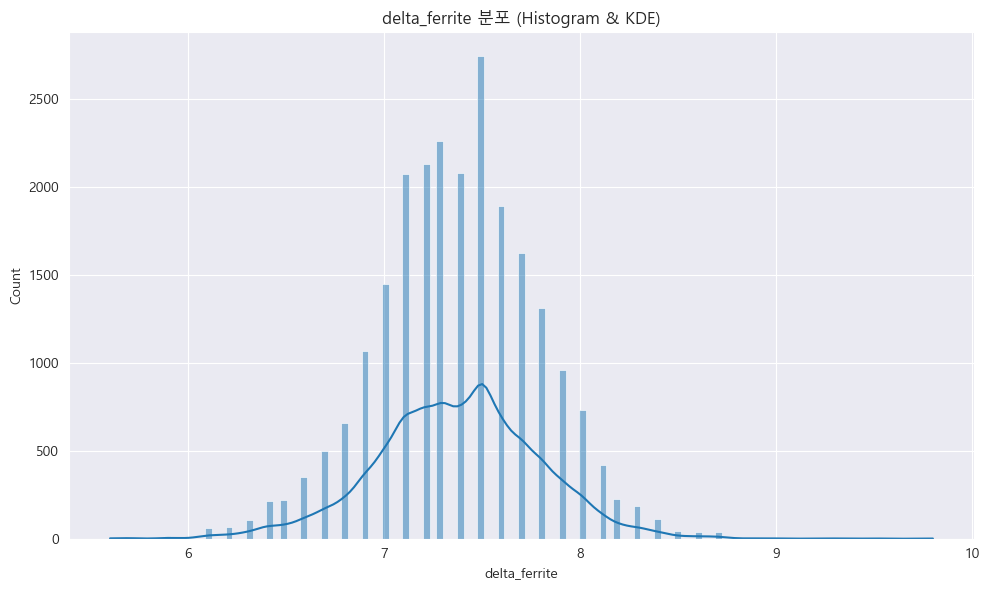

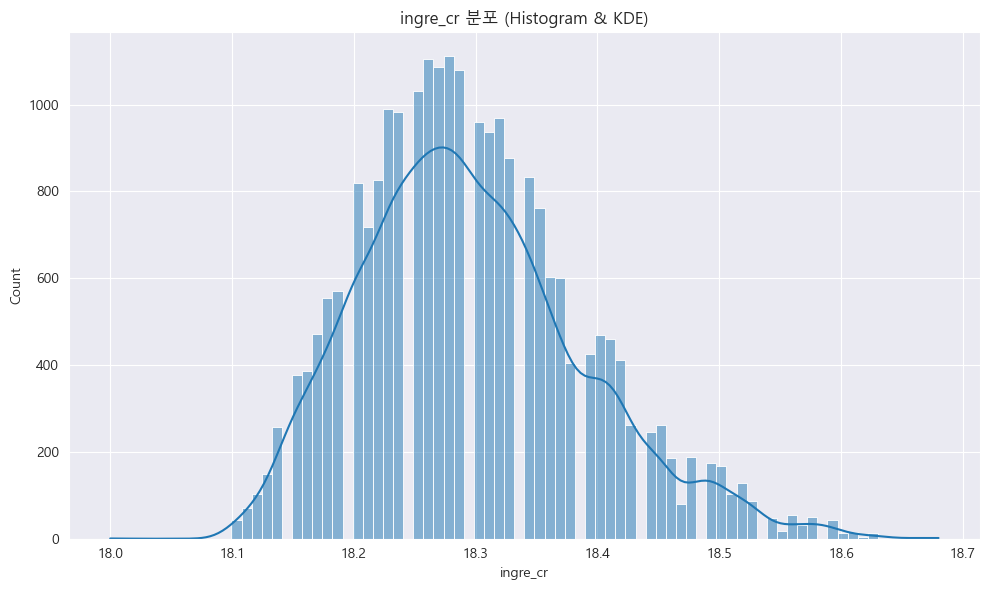

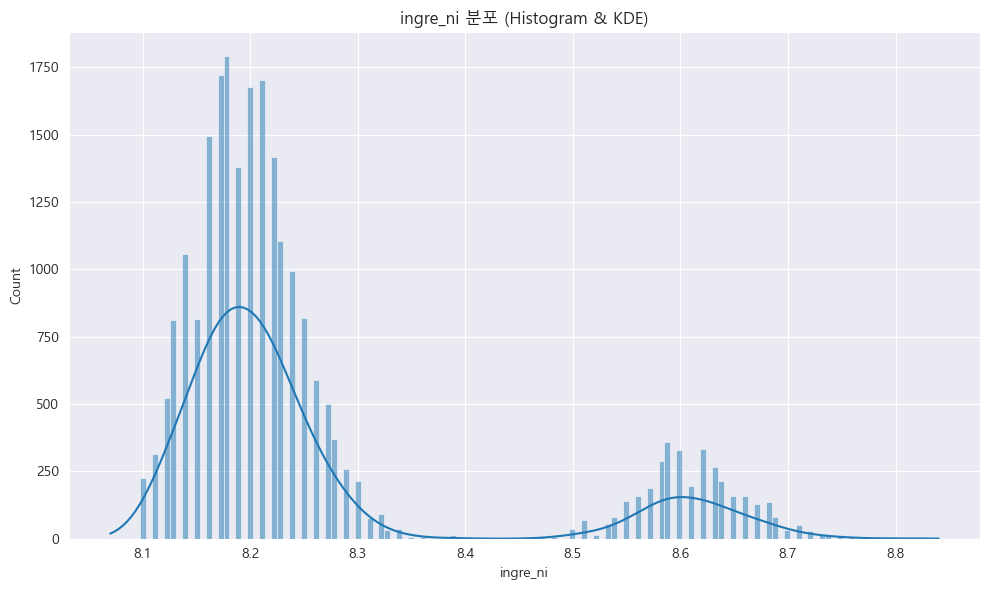

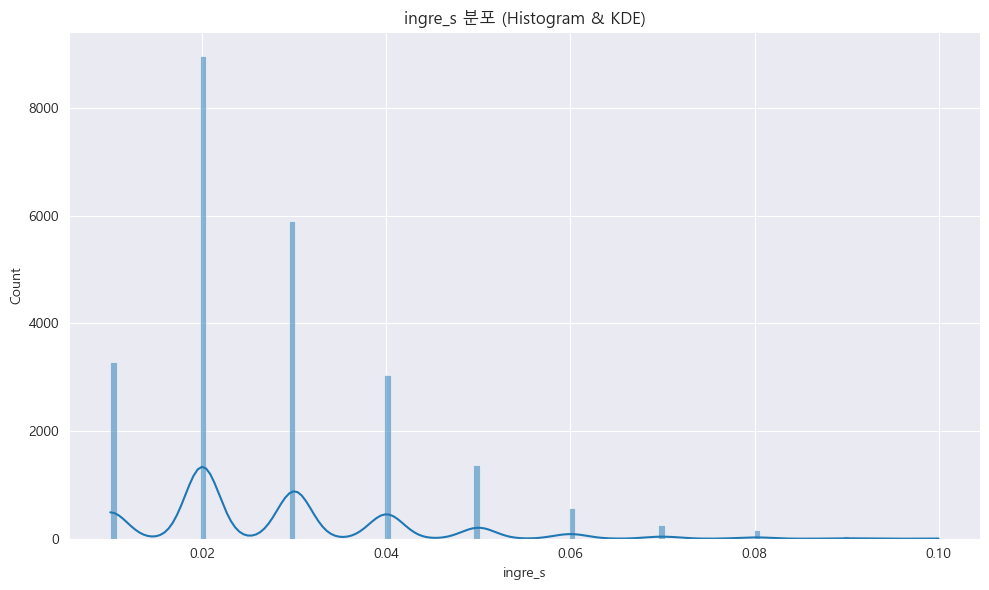

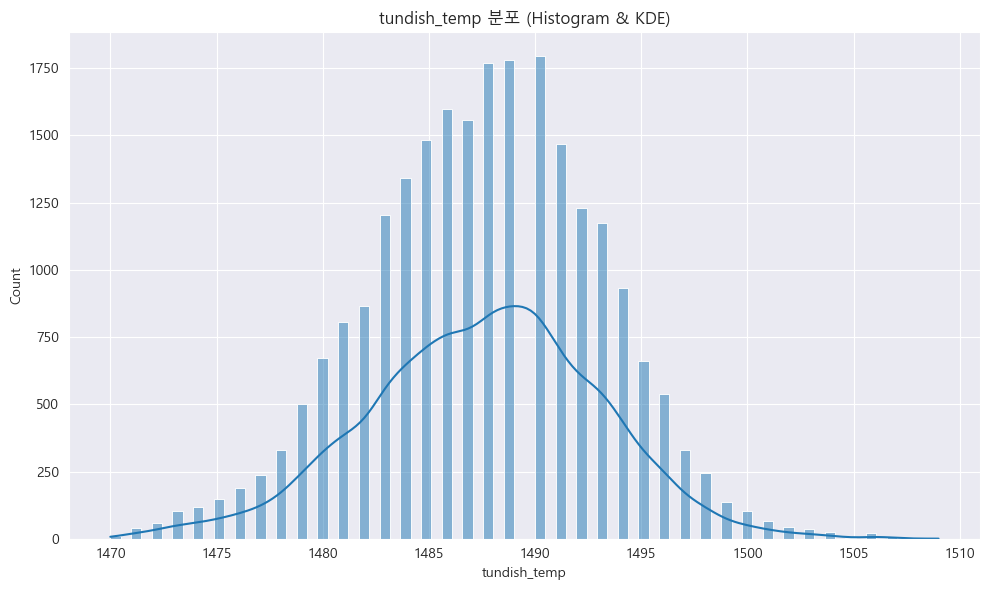

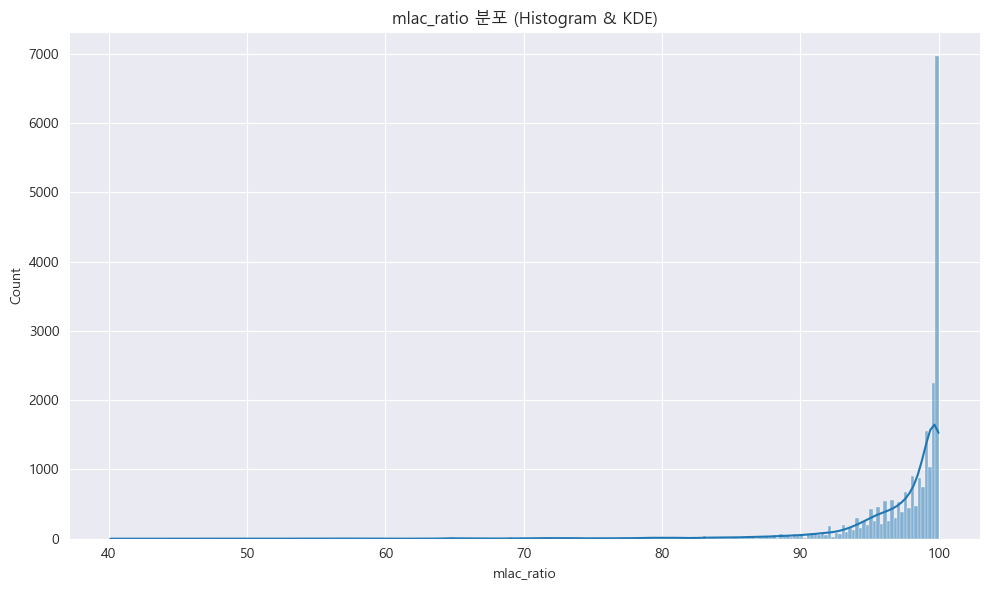

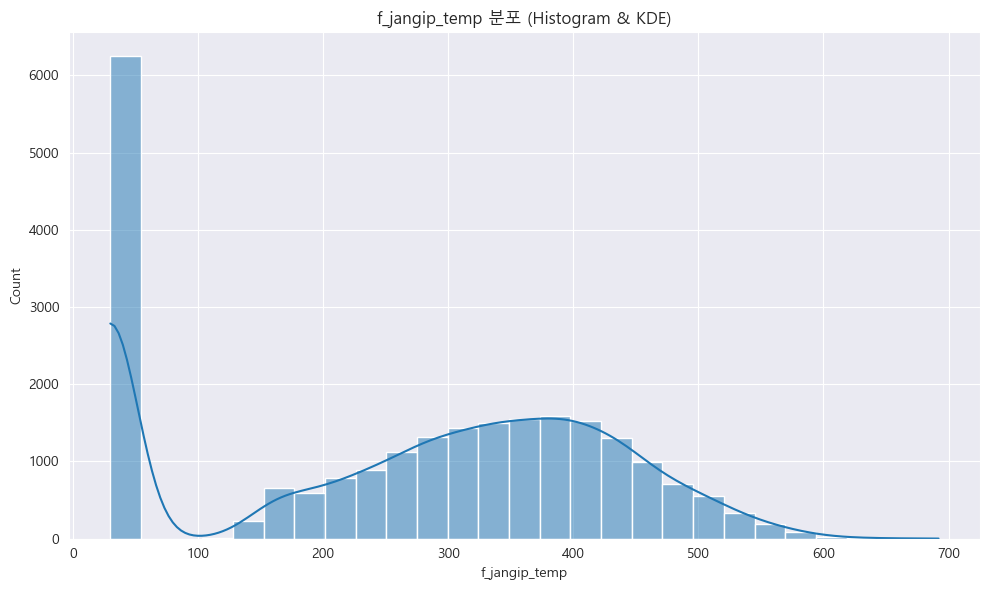

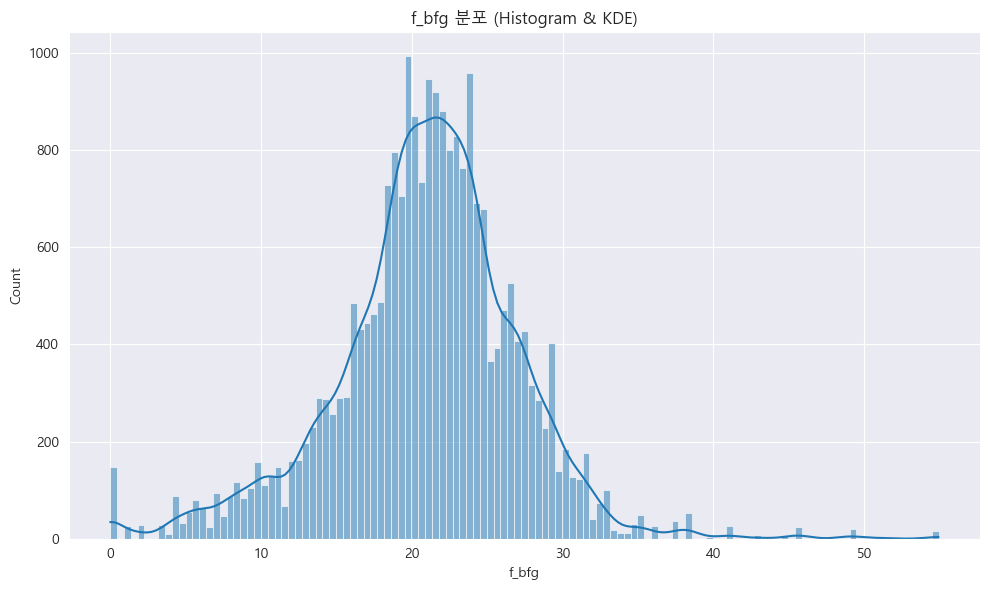

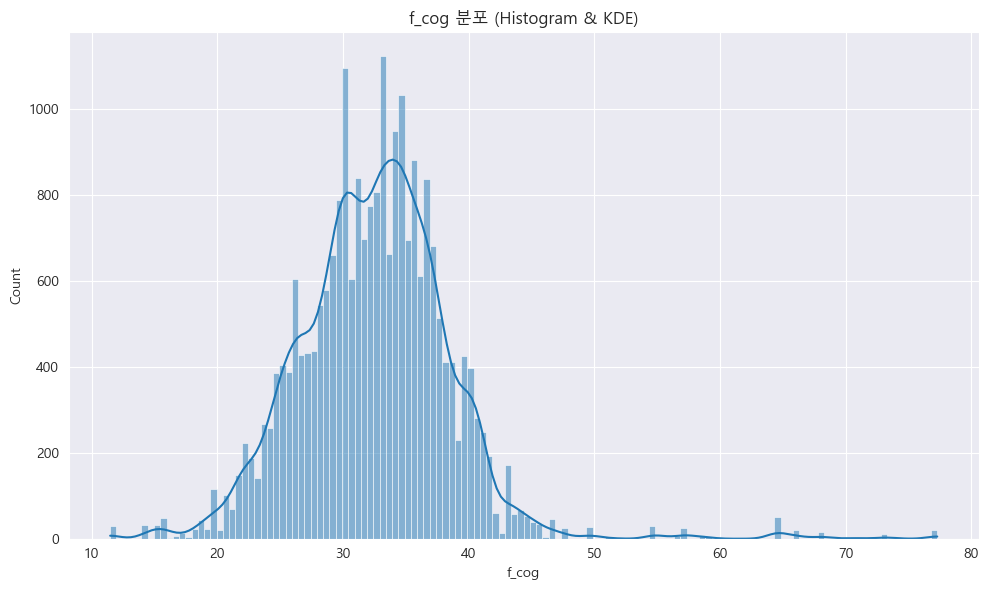

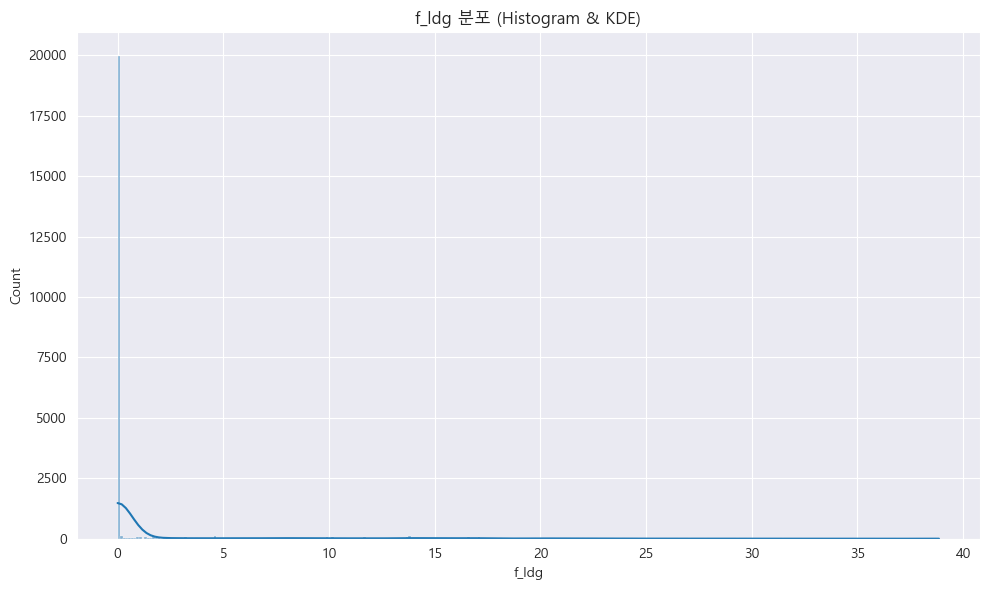

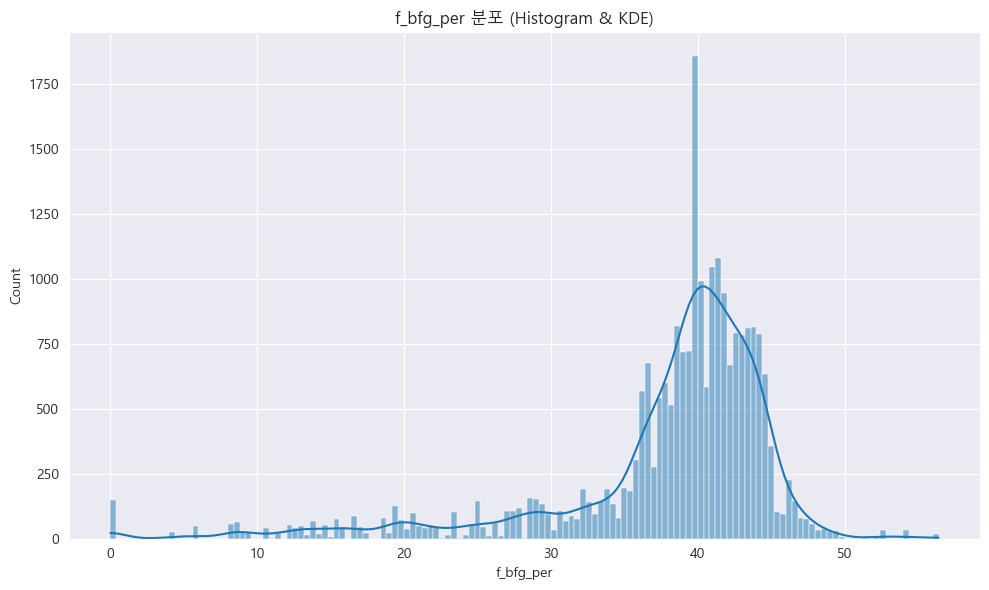

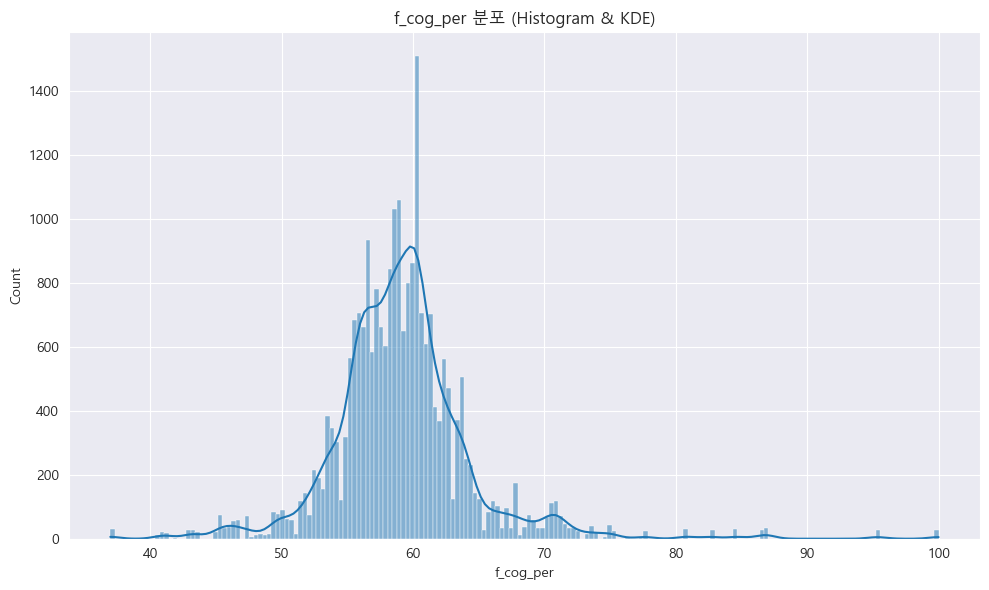

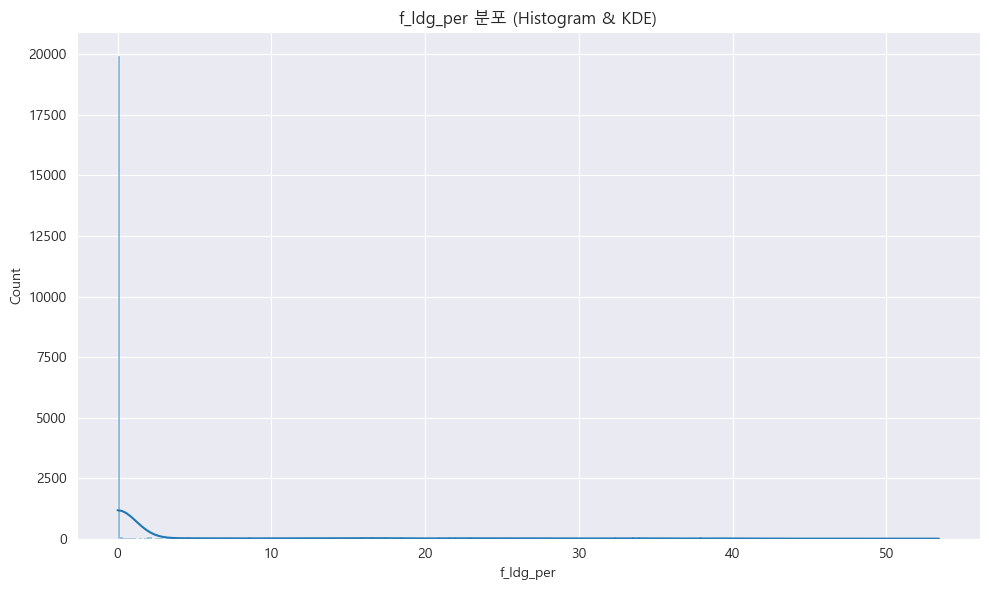

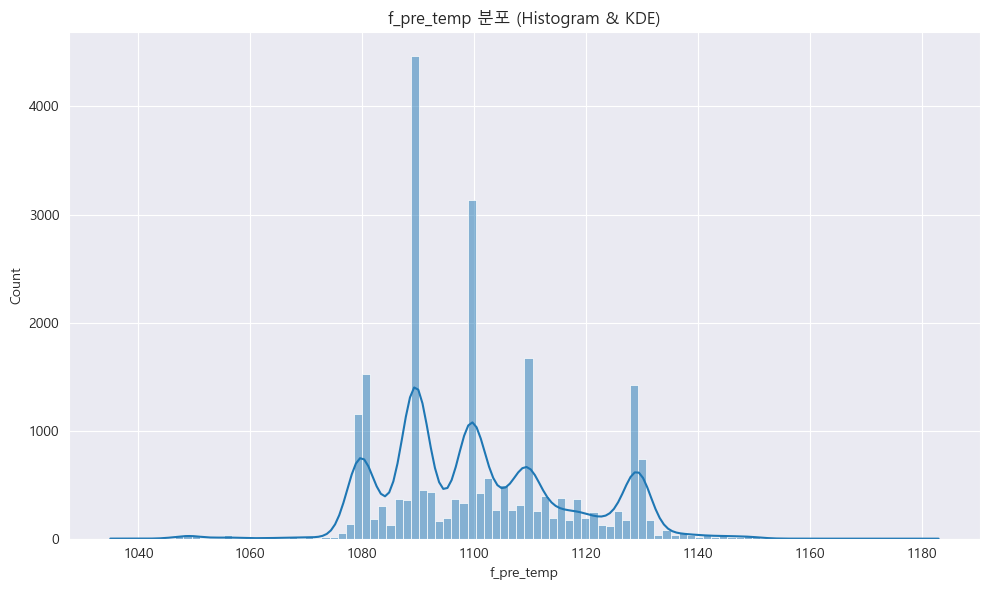

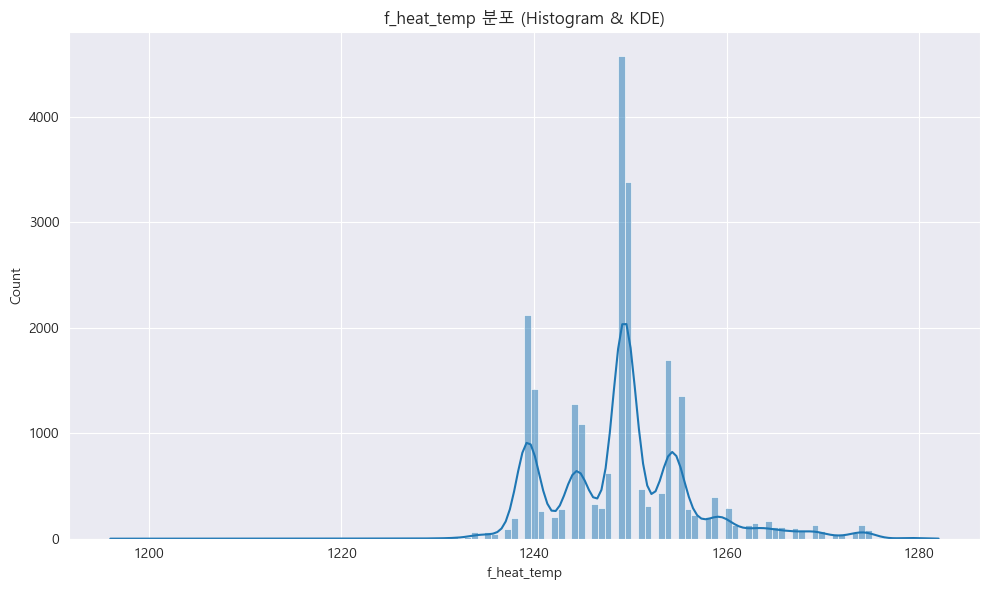

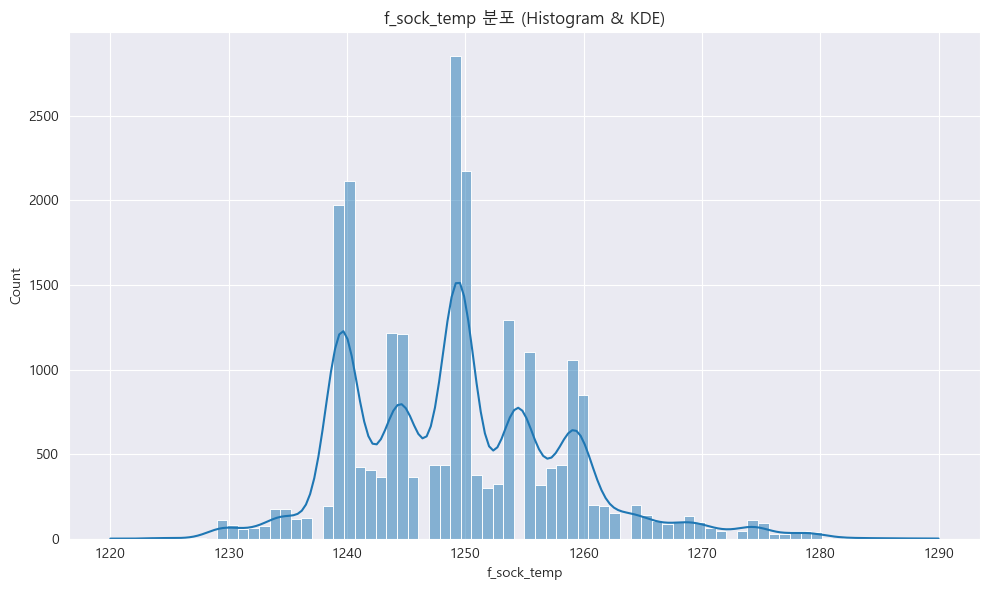

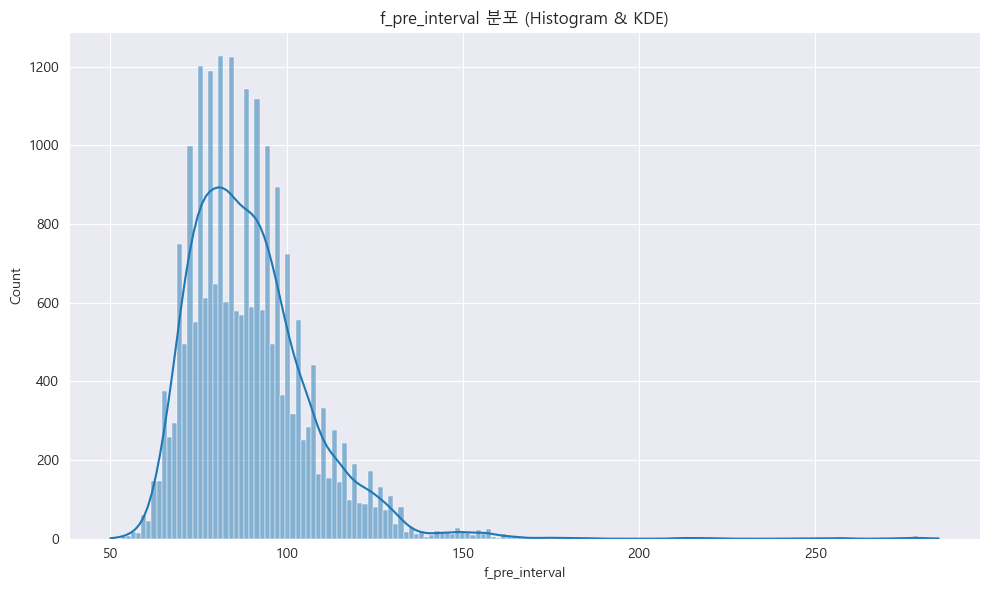

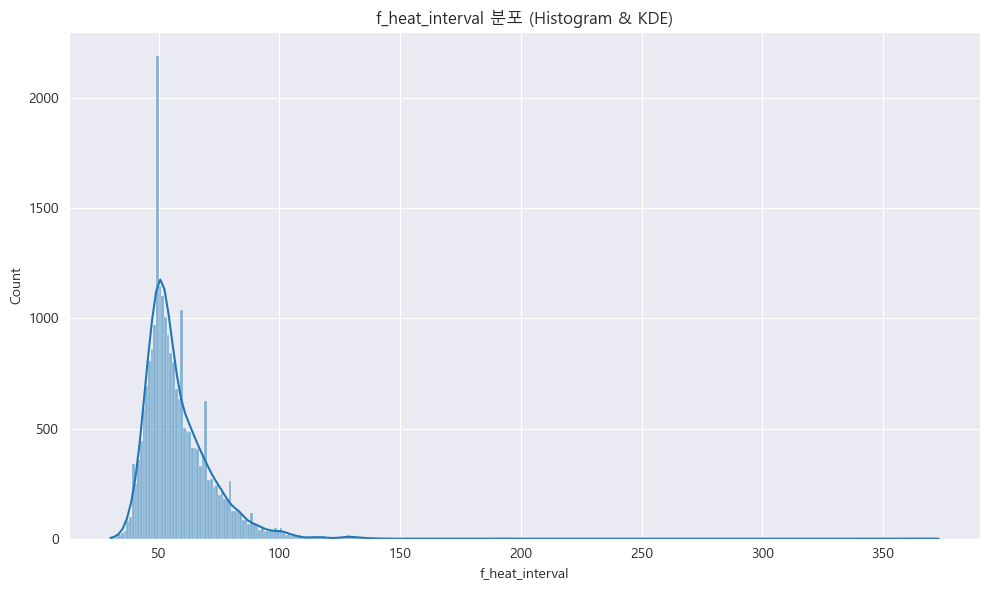

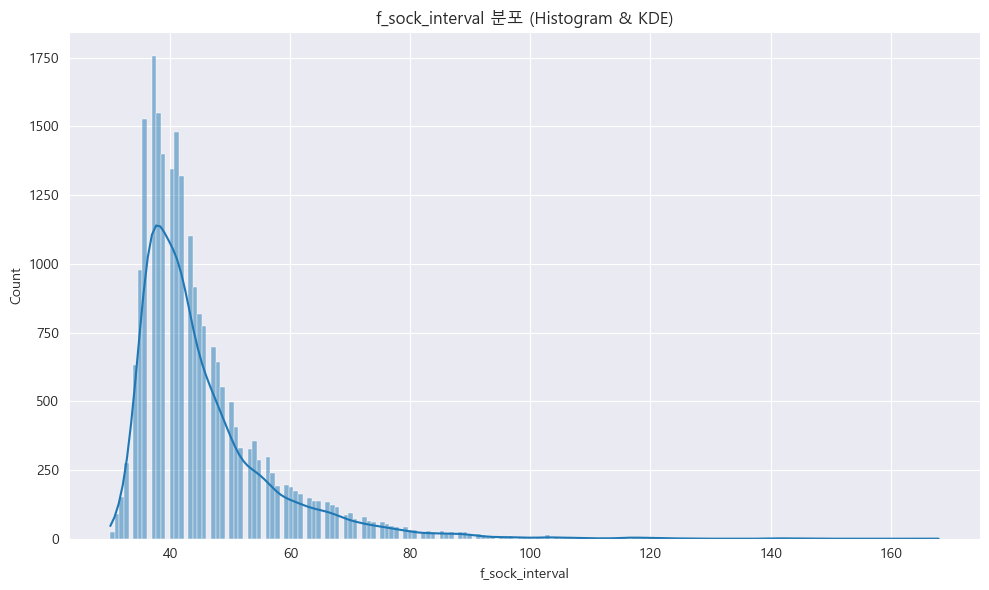

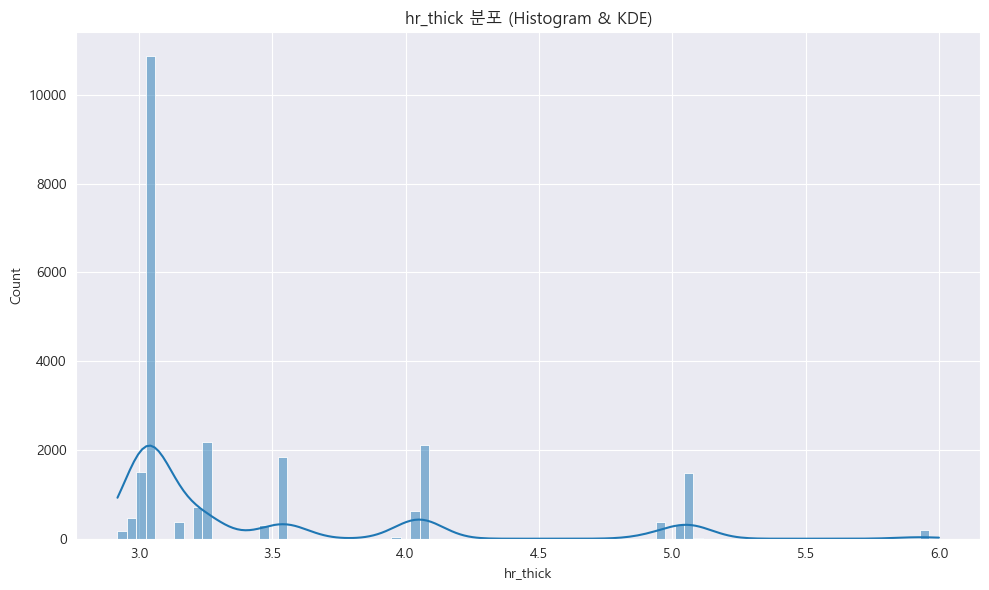

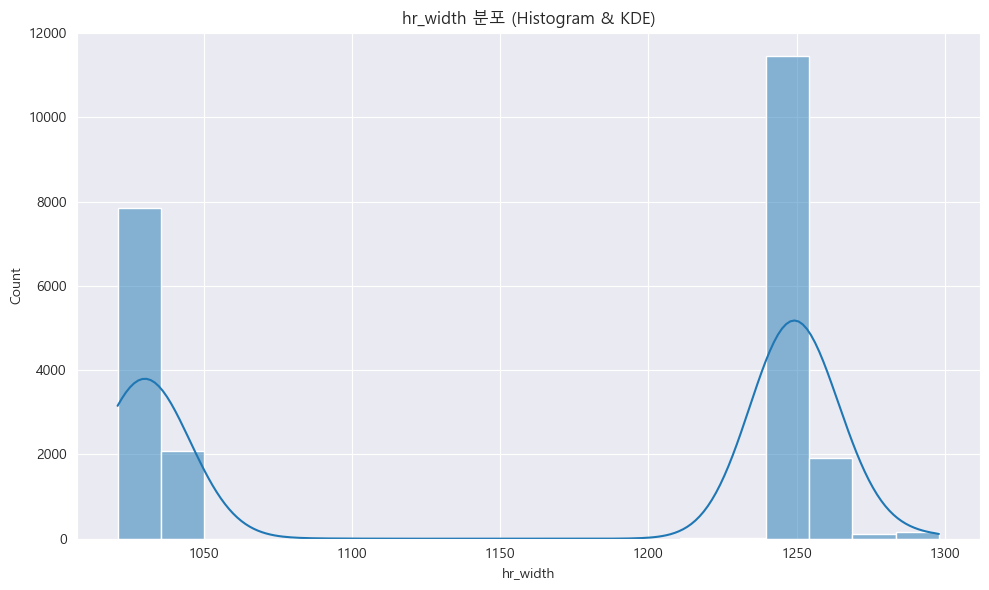

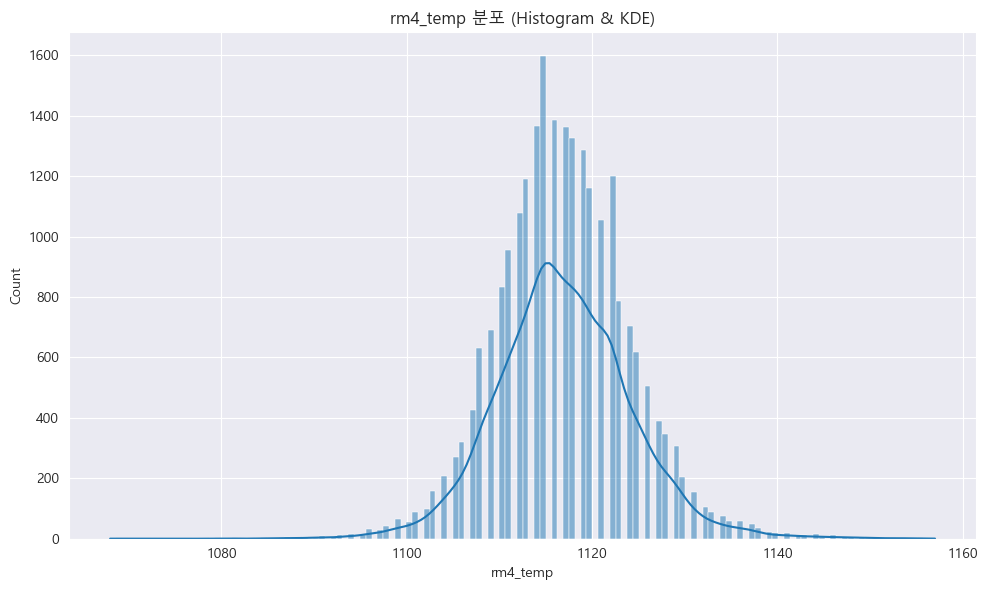

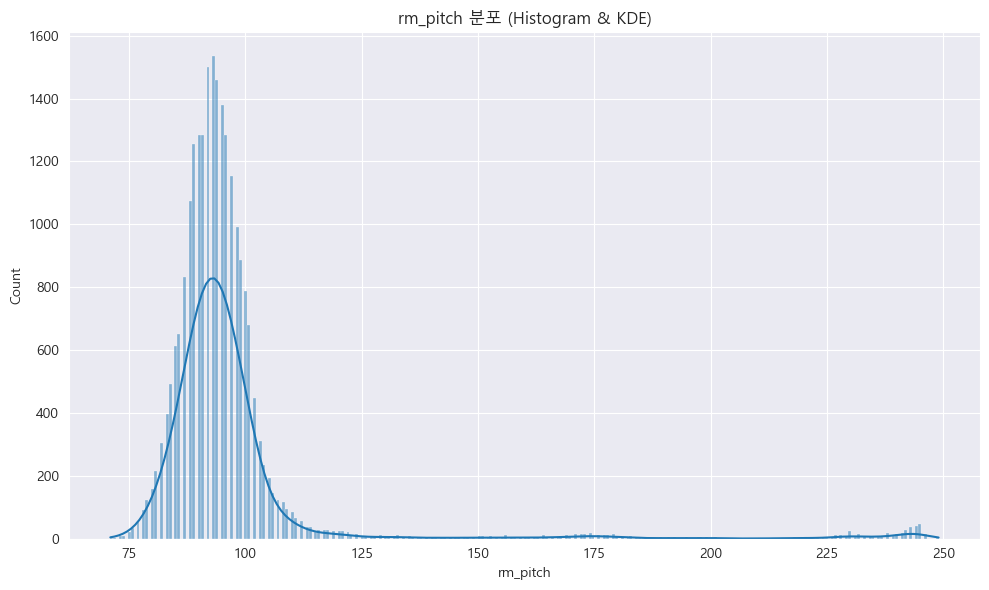

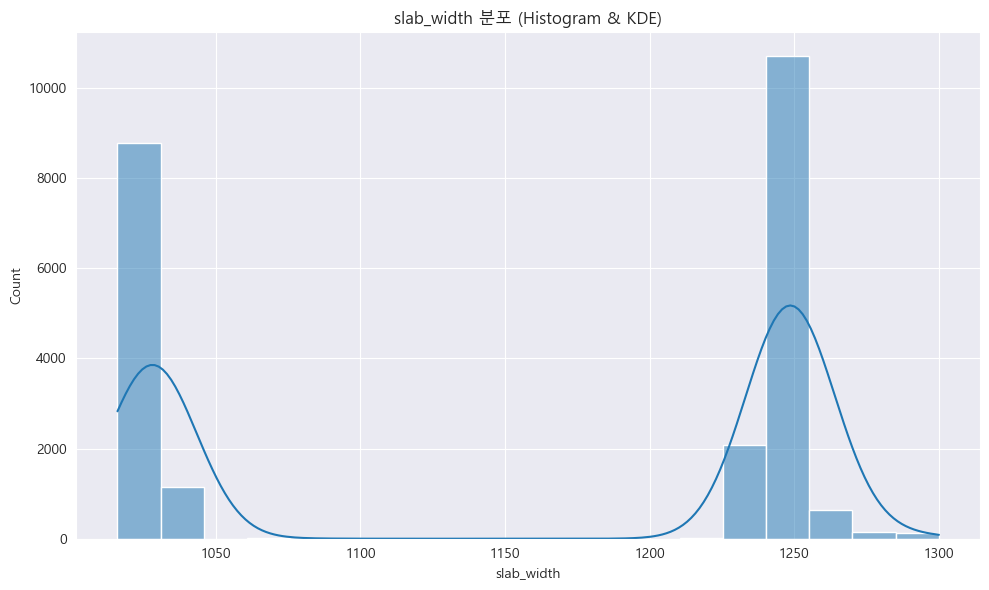

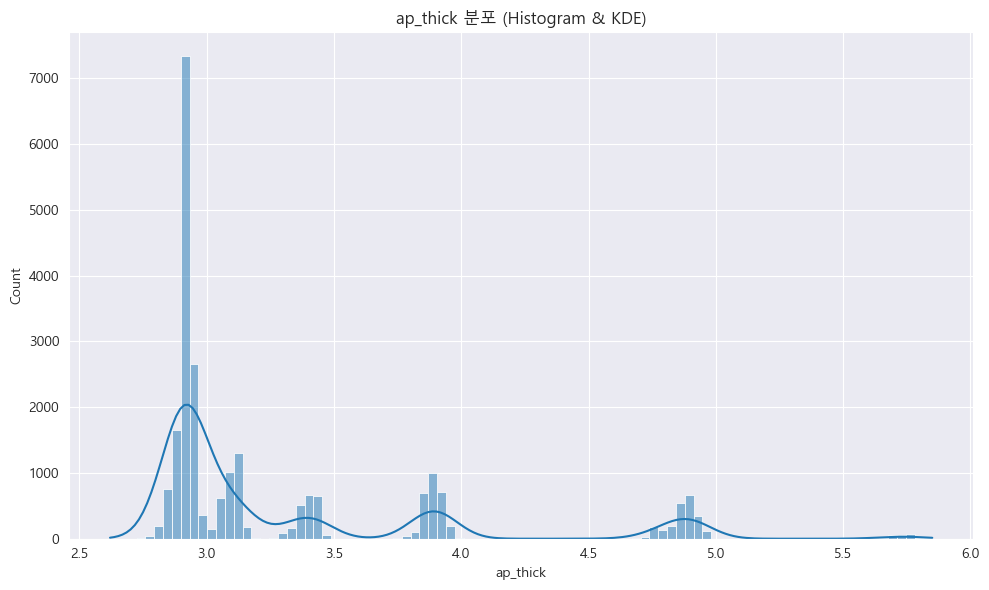

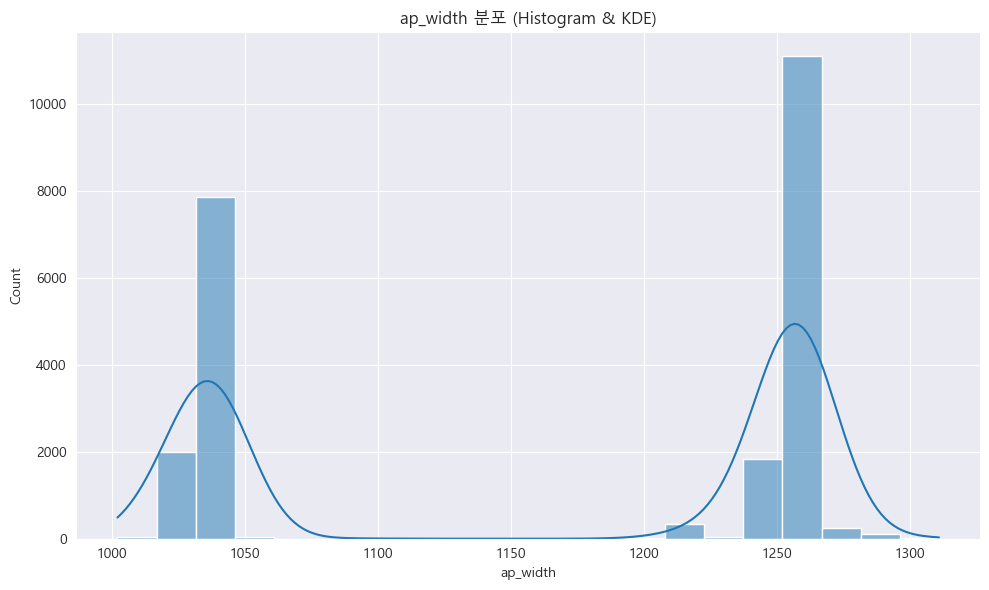

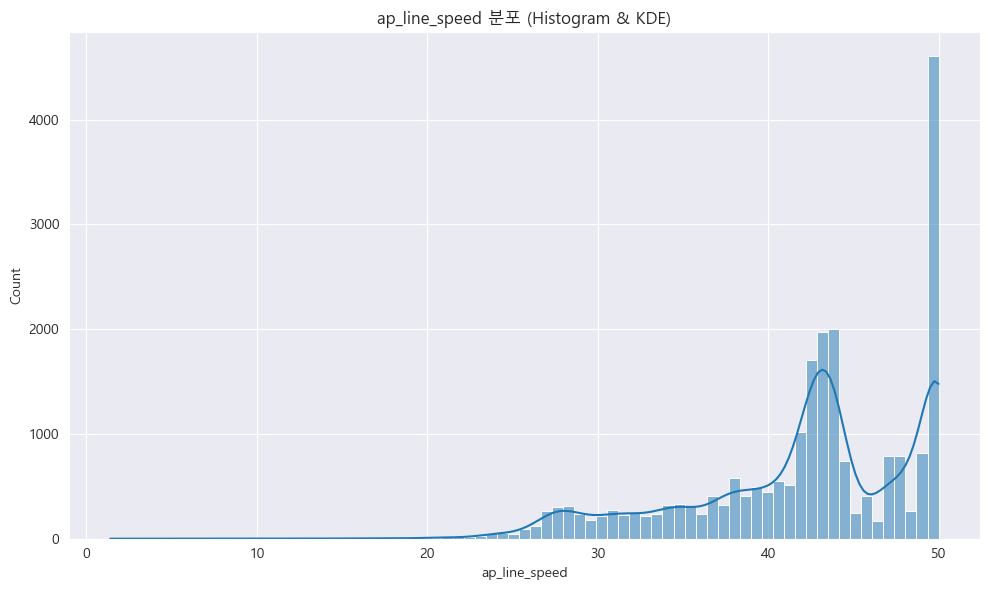

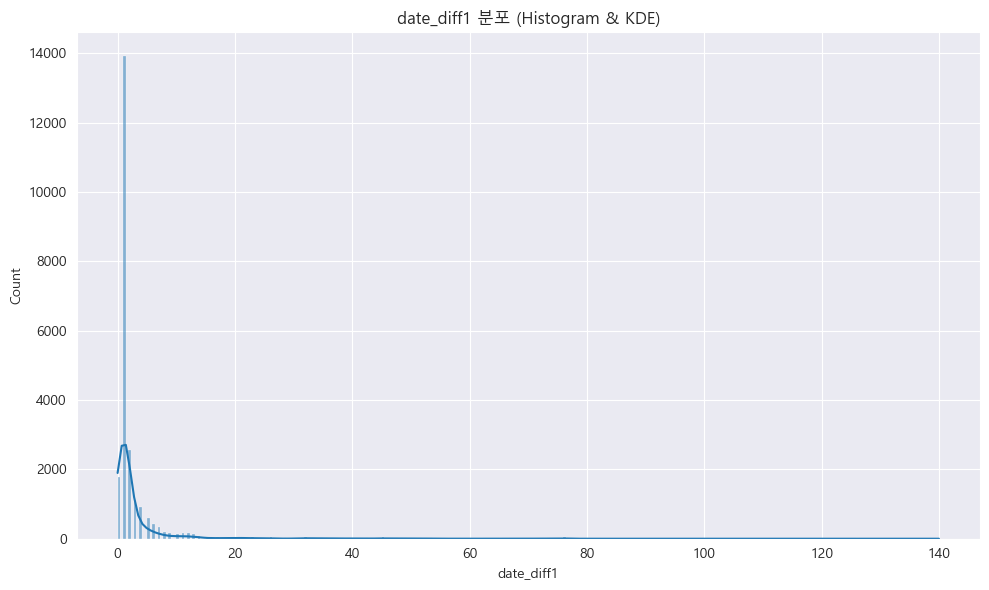

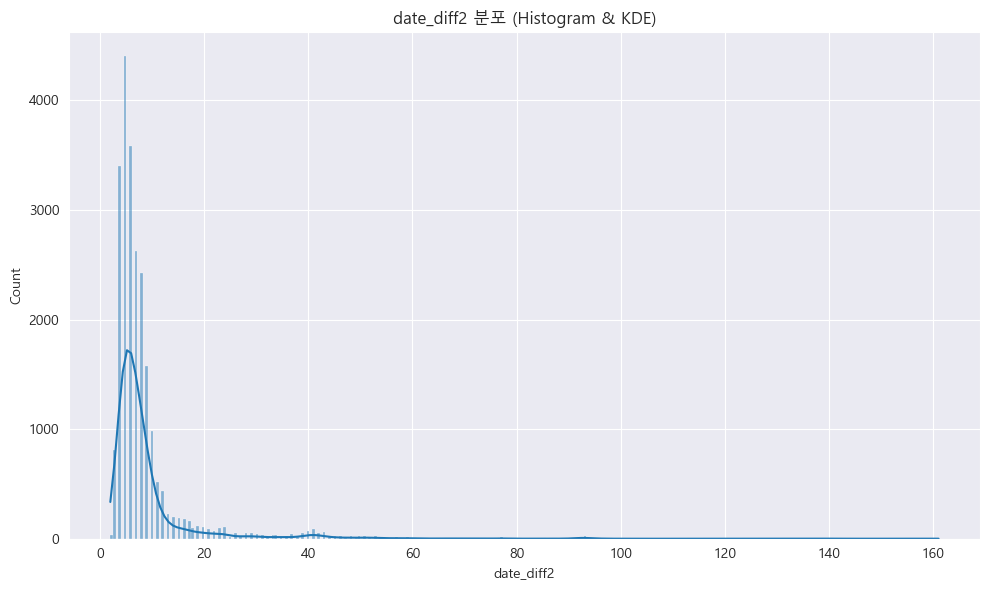

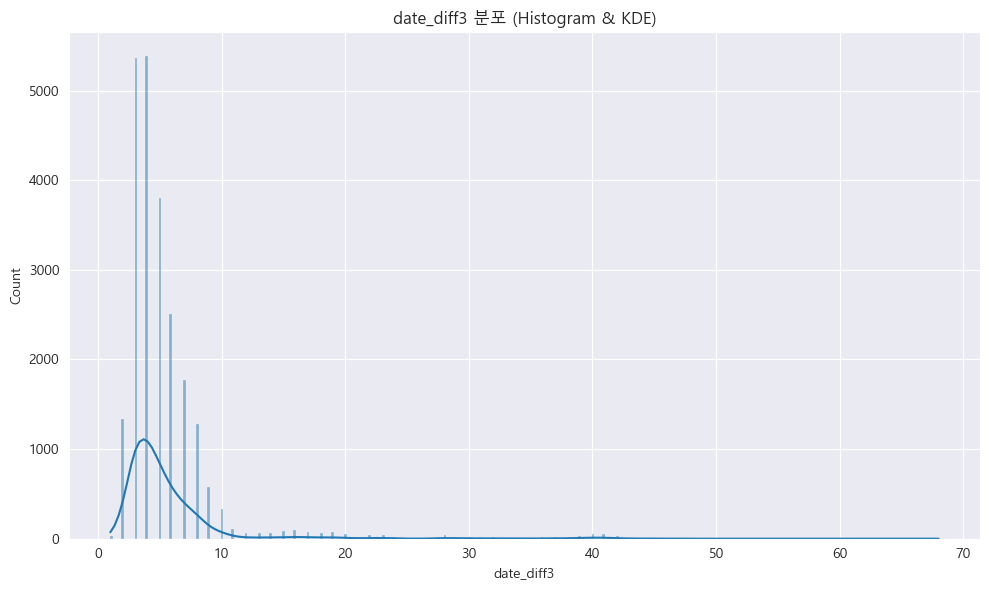

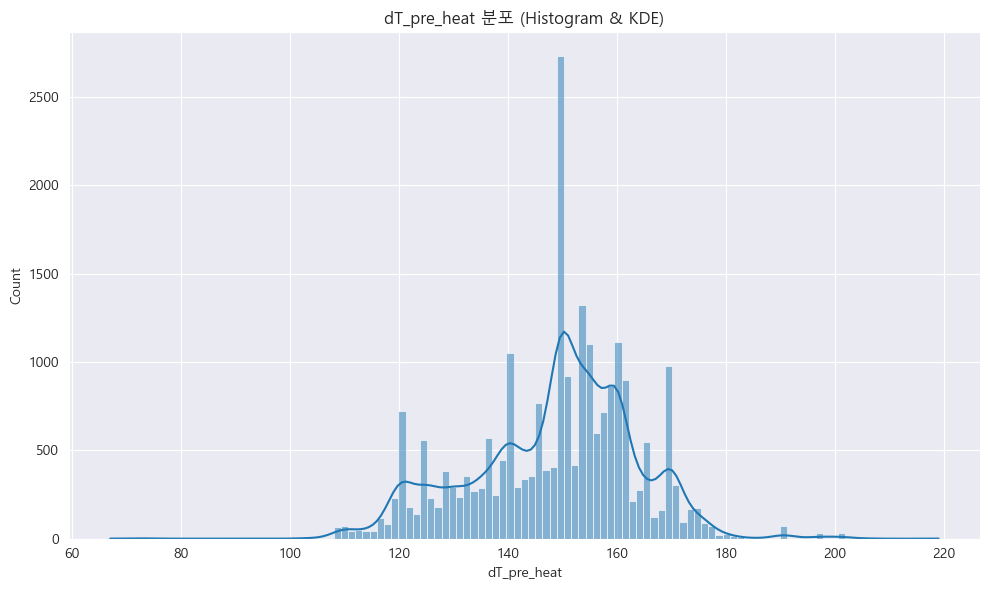

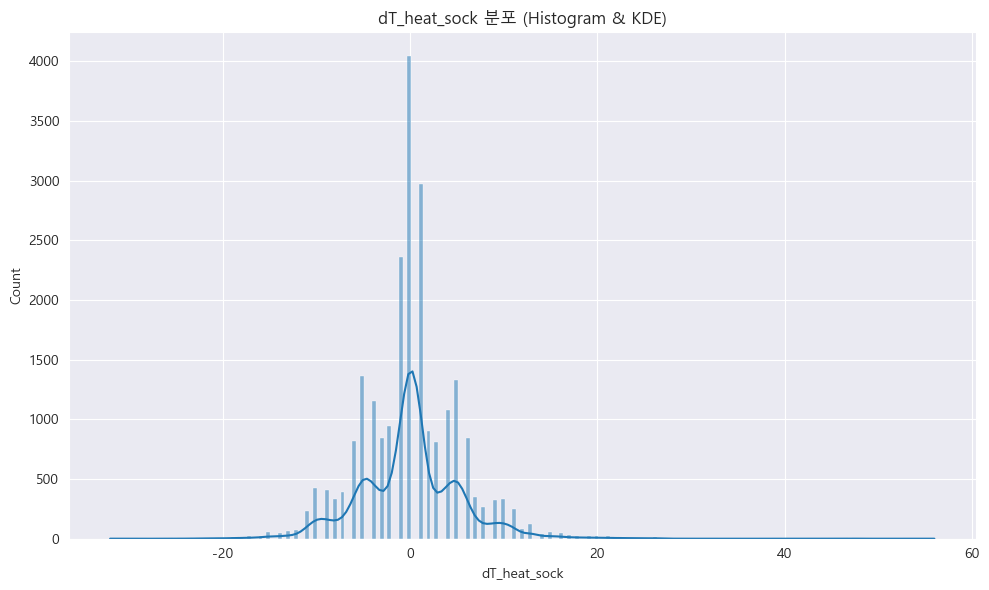

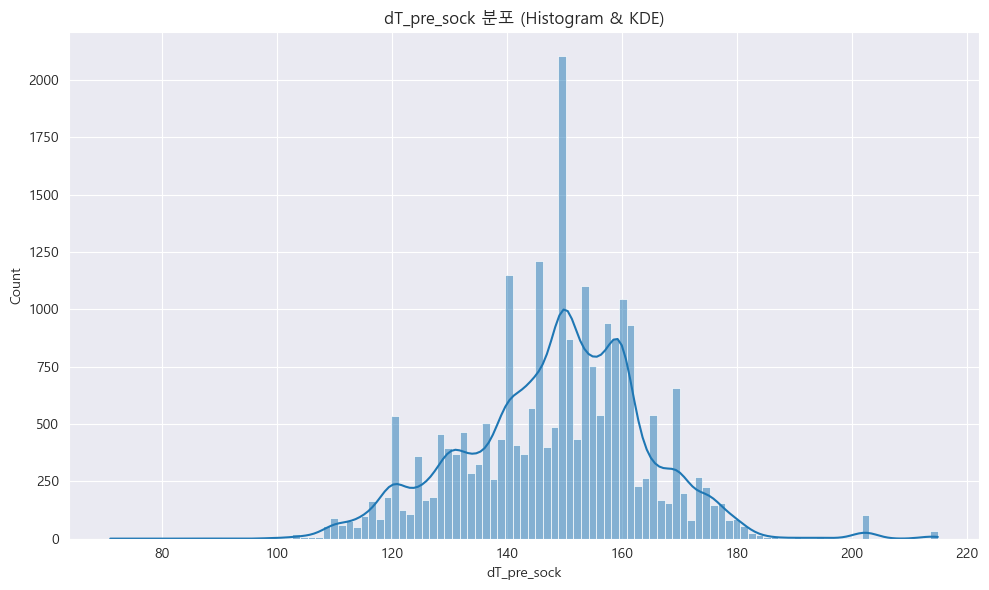

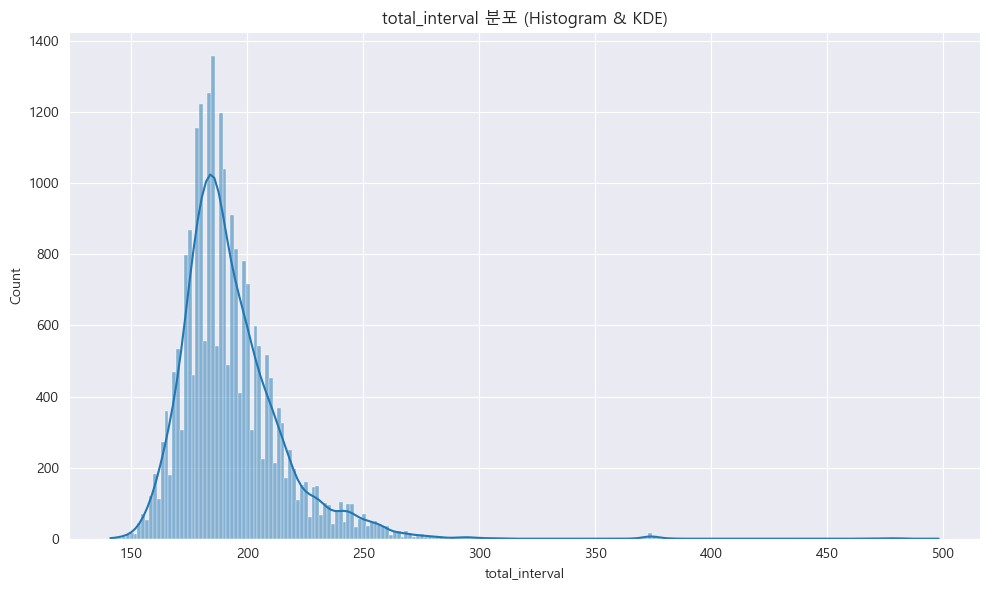

In [71]:
#시각화로 정규성 판단
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['axes.unicode_minus'] = False

continuous_vars_to_plot = [
    'delta_ferrite','ingre_cr','ingre_ni','ingre_s','tundish_temp','mlac_ratio','slab_no',
    'f_jangip_temp','f_bfg','f_cog','f_ldg','f_bfg_per','f_cog_per','f_ldg_per',
    'f_pre_temp','f_heat_temp','f_sock_temp','f_pre_interval','f_heat_interval','f_sock_interval',
    'f_ext_time','hr_thick','hr_width','rm4_temp','rm_pitch','slab_width','ap_thick',
    'ap_width','ap_line_speed','date_diff1','date_diff2','date_diff3','dT_pre_heat','dT_heat_sock','dT_pre_sock','total_interval'
]

for var in continuous_vars_to_plot:
    if var not in df_raw.columns:
        continue
    data = df_raw[var].dropna()
    if data.empty:
        continue
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.title(f'{var} 분포 (Histogram & KDE)')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [72]:
# 그래프보고 정규분포 모양을 띄는 변수들 등분산성 검정
from scipy import stats
vars_list = ["rm4_temp", "tundish_temp", "ingre_cr", "delta_ferrite"]
for var in vars_list:
    good = df_raw[df_raw["judge"] == "양품"][var].dropna()
    bad  = df_raw[df_raw["judge"] == "불량"][var].dropna()
    if len(good) > 1 and len(bad) > 1:
        stat, p = stats.levene(good, bad)
        print(f"{var}: stat={stat:.4f}, p-value={p:.5f}")

rm4_temp: stat=15.4258, p-value=0.00009
tundish_temp: stat=0.1324, p-value=0.71595
ingre_cr: stat=7.9586, p-value=0.00479
delta_ferrite: stat=23.3167, p-value=0.00000


In [73]:
#t-test 실시(0.05>p-value = Welch’s)
from scipy import stats
good = df_raw[df_raw["judge"] == "양품"]["tundish_temp"].dropna()
bad  = df_raw[df_raw["judge"] == "불량"]["tundish_temp"].dropna()

stat, p = stats.ttest_ind(good, bad, equal_var=True)
print(f"Welch’s t-test: stat={stat:.4f}, p-value={p:.5f}")

vars_list = ["rm4_temp", "delta_ferrite", "ingre_cr", "tundish_temp"]

for var in vars_list:
    good = df_raw[df_raw["judge"] == "양품"][var].dropna()
    bad  = df_raw[df_raw["judge"] == "불량"][var].dropna()
    if len(good) > 1 and len(bad) > 1:
        stat, p = stats.ttest_ind(good, bad, equal_var=False)
        print(f"t-test: {var}: stat={stat:.4f}, p-value={p:.5f}")

Welch’s t-test: stat=0.0828, p-value=0.93398
t-test: rm4_temp: stat=-2.9098, p-value=0.00374
t-test: delta_ferrite: stat=0.0172, p-value=0.98629
t-test: ingre_cr: stat=2.0830, p-value=0.03763
t-test: tundish_temp: stat=0.0843, p-value=0.93287


In [74]:
#비모수 검정 ( Mann-Whitney U)
vars_list = [
    'ingre_ni','ingre_s','mlac_ratio',
    'f_jangip_temp','f_bfg','f_cog','f_ldg','f_bfg_per','f_cog_per','f_ldg_per',
    'f_pre_temp','f_heat_temp','f_sock_temp','f_pre_interval','f_heat_interval','f_sock_interval',
    'hr_thick','hr_width','rm_pitch','slab_width','ap_thick',
    'ap_width','ap_line_speed','date_diff1','date_diff2','date_diff3',
    'dT_pre_heat','dT_heat_sock','dT_pre_sock','total_interval'
]


for var in vars_list:
    good = df_raw[df_raw["judge"] == "양품"][var].dropna()
    bad  = df_raw[df_raw["judge"] == "불량"][var].dropna()
    if len(good) > 1 and len(bad) > 1:
        stat, p = stats.mannwhitneyu(good, bad, alternative='two-sided')
        print(f"{var}: stat={stat:.4f}, p-value={p:.5f}")



ingre_ni: stat=7326898.5000, p-value=0.58859
ingre_s: stat=7383359.0000, p-value=0.36314
mlac_ratio: stat=7640547.0000, p-value=0.01543
f_jangip_temp: stat=10420400.5000, p-value=0.00000
f_bfg: stat=7205257.0000, p-value=0.85690
f_cog: stat=7469510.0000, p-value=0.16610
f_ldg: stat=6902163.5000, p-value=0.00428
f_bfg_per: stat=7243494.0000, p-value=0.96319
f_cog_per: stat=7492617.0000, p-value=0.12808
f_ldg_per: stat=6902497.0000, p-value=0.00432
f_pre_temp: stat=5777691.5000, p-value=0.00000
f_heat_temp: stat=7100679.5000, p-value=0.42107
f_sock_temp: stat=6721457.0000, p-value=0.00227
f_pre_interval: stat=6905261.0000, p-value=0.05028
f_heat_interval: stat=7119732.0000, p-value=0.49195
f_sock_interval: stat=5911157.5000, p-value=0.00000
hr_thick: stat=6279665.5000, p-value=0.00000
hr_width: stat=7590750.0000, p-value=0.03134
rm_pitch: stat=6945346.0000, p-value=0.08515
slab_width: stat=7607384.0000, p-value=0.02692
ap_thick: stat=6402560.5000, p-value=0.00000
ap_width: stat=7441327.0

--------------------------------------------------------
카이제곱검정 - 범주형과 종속변수간의 검정

In [75]:
from scipy.stats import chi2_contingency
import pandas as pd

cat_vars = ["steel_usage", "f_jangip_gubun", "sm_plant", "ap_shift",
    "ap_plant", "furnace_no", "steel_grade", "slab_gubun", "cc_gubun","slab_grind"]
for i, col in enumerate(cat_vars, start=1):
    try:
        ct = pd.crosstab(df_raw[col], df_raw["judge"])
        chi2, p, dof, expected = chi2_contingency(ct)
        print(f"{i}. {col} 카이제곱 통계량={chi2:.3f}, 자유도={dof}, p-value={p:.4f}")
    except Exception as e:
        print(f"{i}. {col} → 오류 발생: {e}")

1. steel_usage 카이제곱 통계량=131.441, 자유도=4, p-value=0.0000
2. f_jangip_gubun 카이제곱 통계량=242.482, 자유도=1, p-value=0.0000
3. sm_plant 카이제곱 통계량=41.595, 자유도=1, p-value=0.0000
4. ap_shift 카이제곱 통계량=44.019, 자유도=3, p-value=0.0000
5. ap_plant 카이제곱 통계량=9.657, 자유도=1, p-value=0.0019
6. furnace_no 카이제곱 통계량=14.415, 자유도=3, p-value=0.0024
7. steel_grade 카이제곱 통계량=1.659, 자유도=1, p-value=0.1978
8. slab_gubun 카이제곱 통계량=1.762, 자유도=2, p-value=0.4143
9. cc_gubun 카이제곱 통계량=1.481, 자유도=3, p-value=0.6867
10. slab_grind 카이제곱 통계량=59.556, 자유도=6, p-value=0.0000


-----------------------------------------------------------------------------------------------
데이터 분석 및 시각화

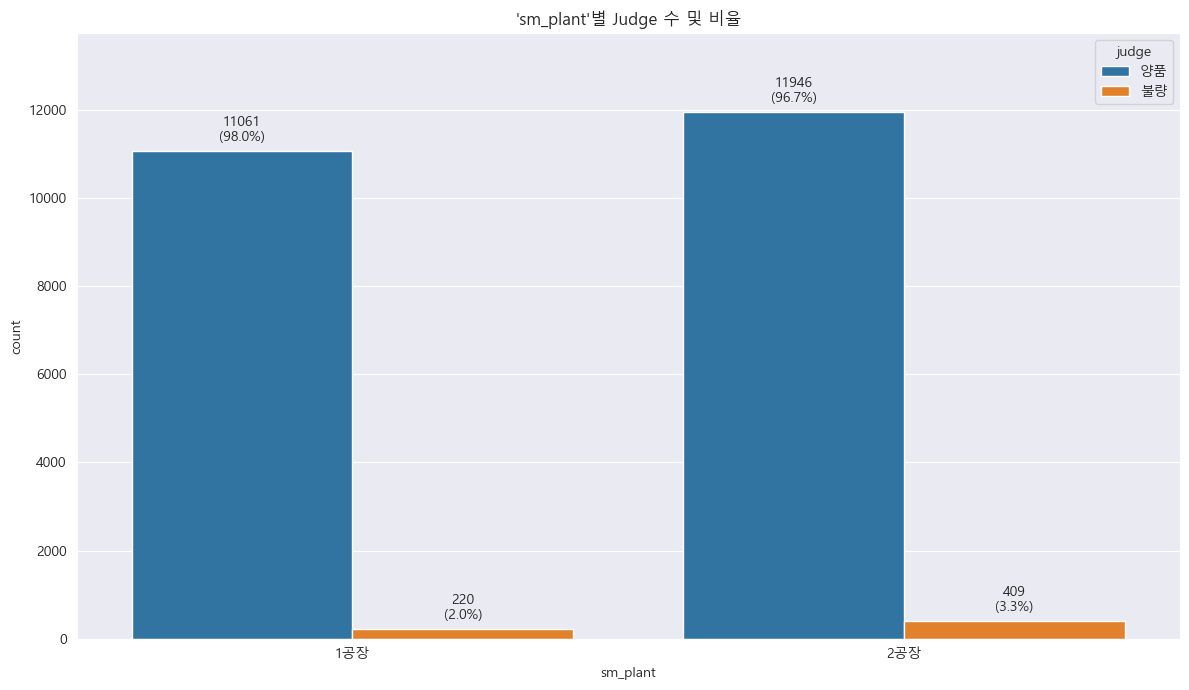

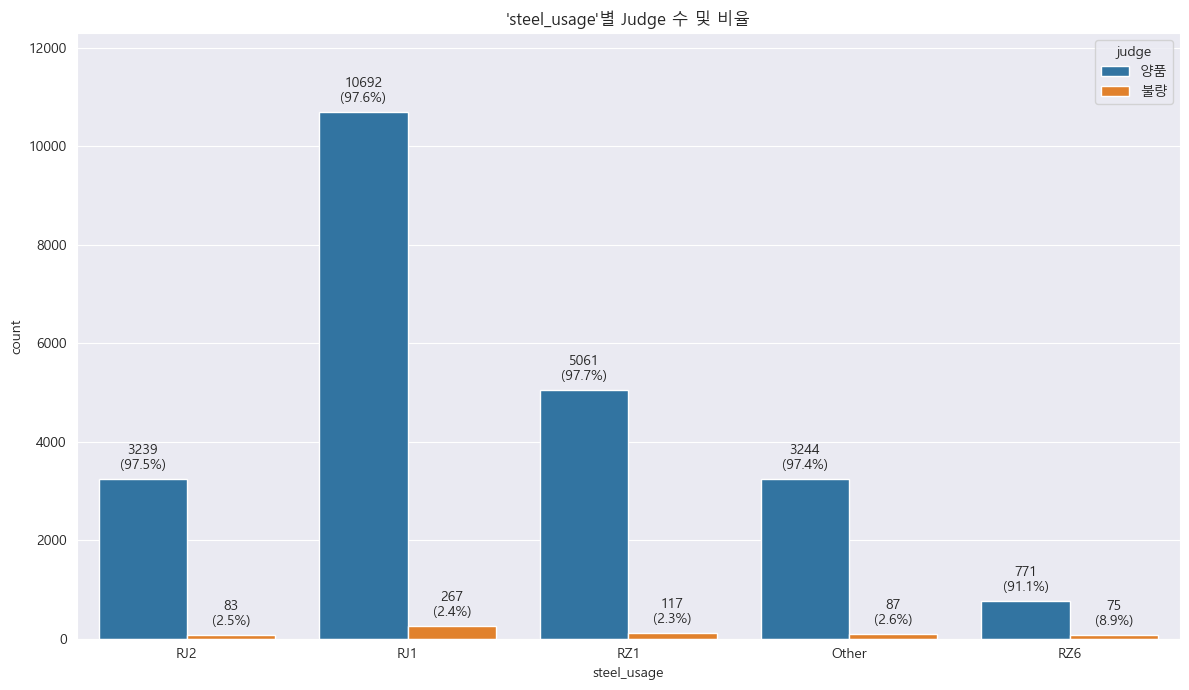

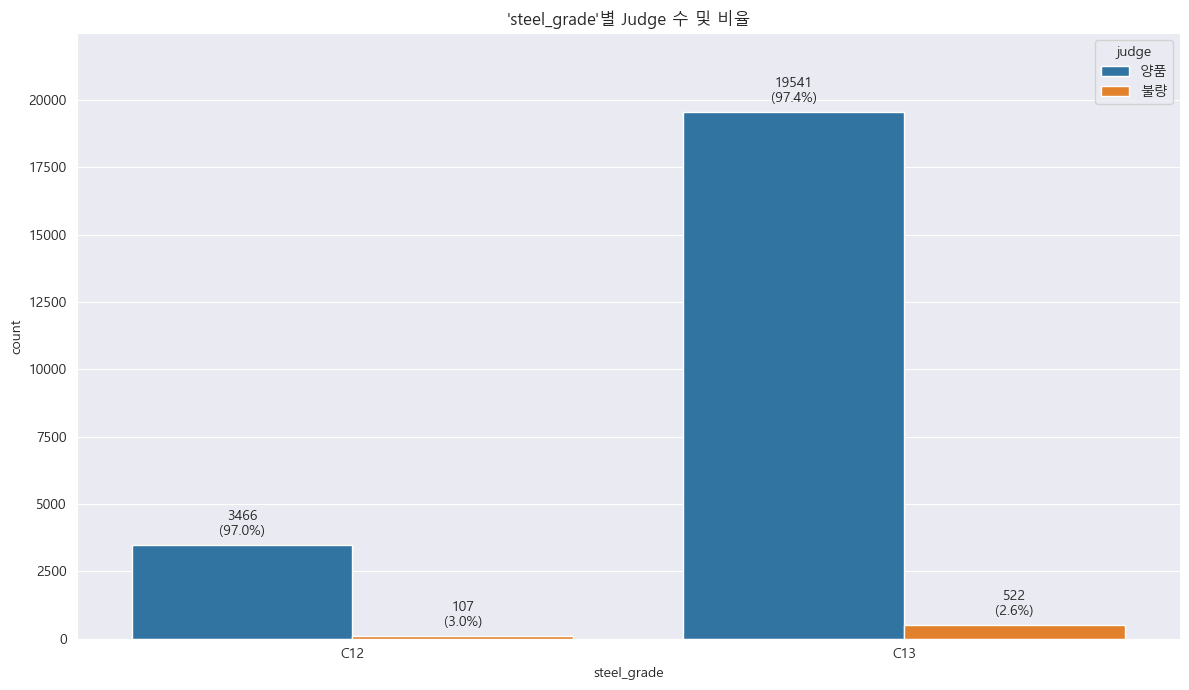

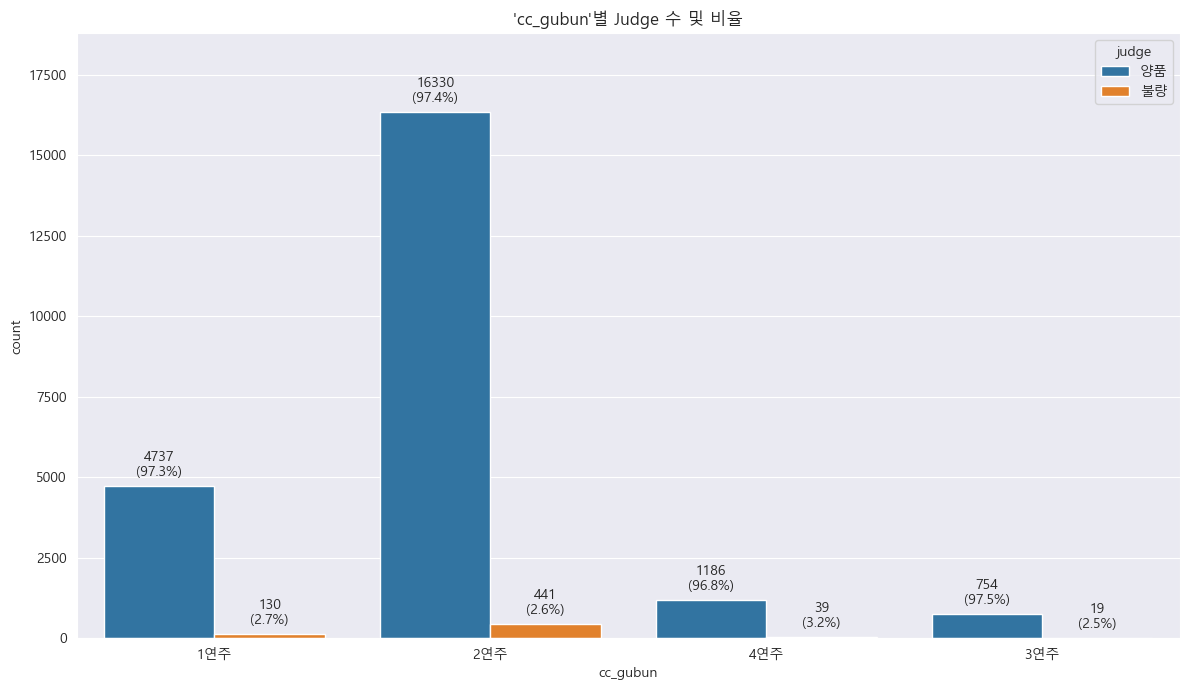

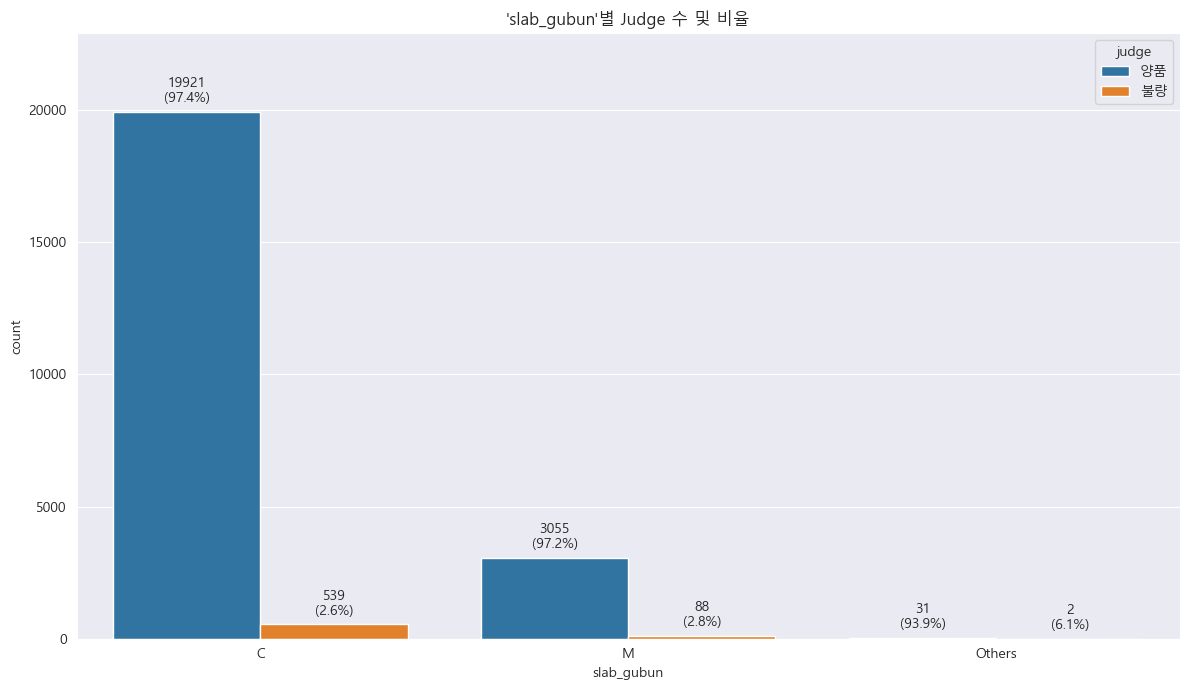

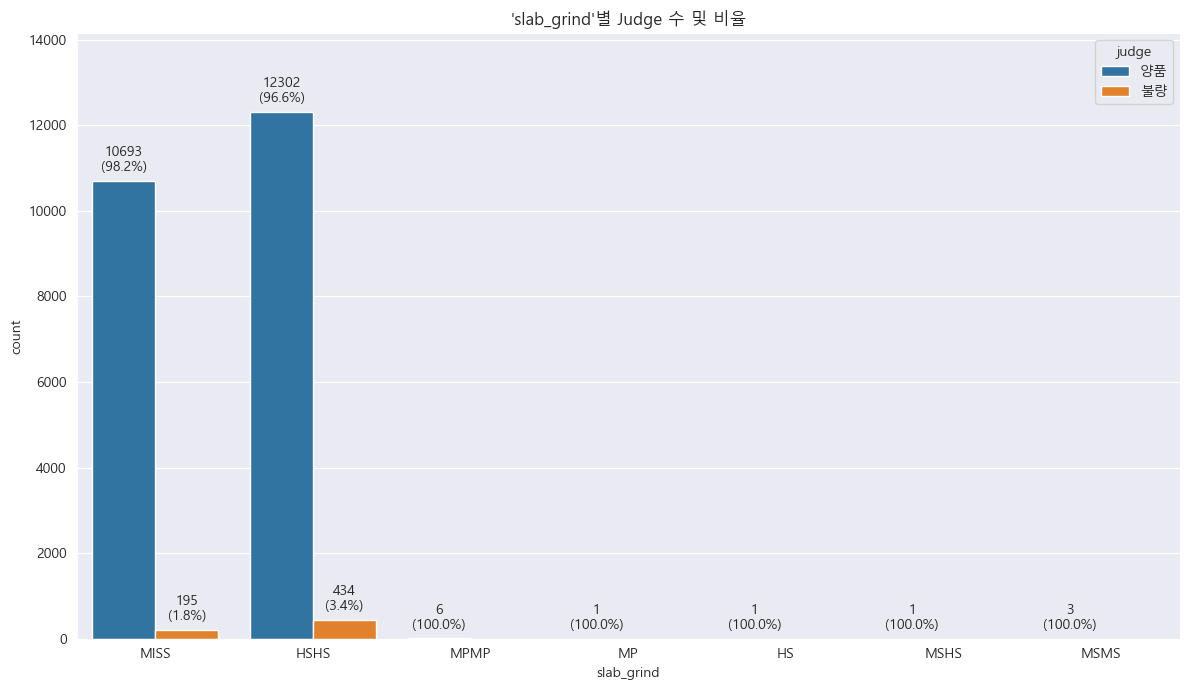

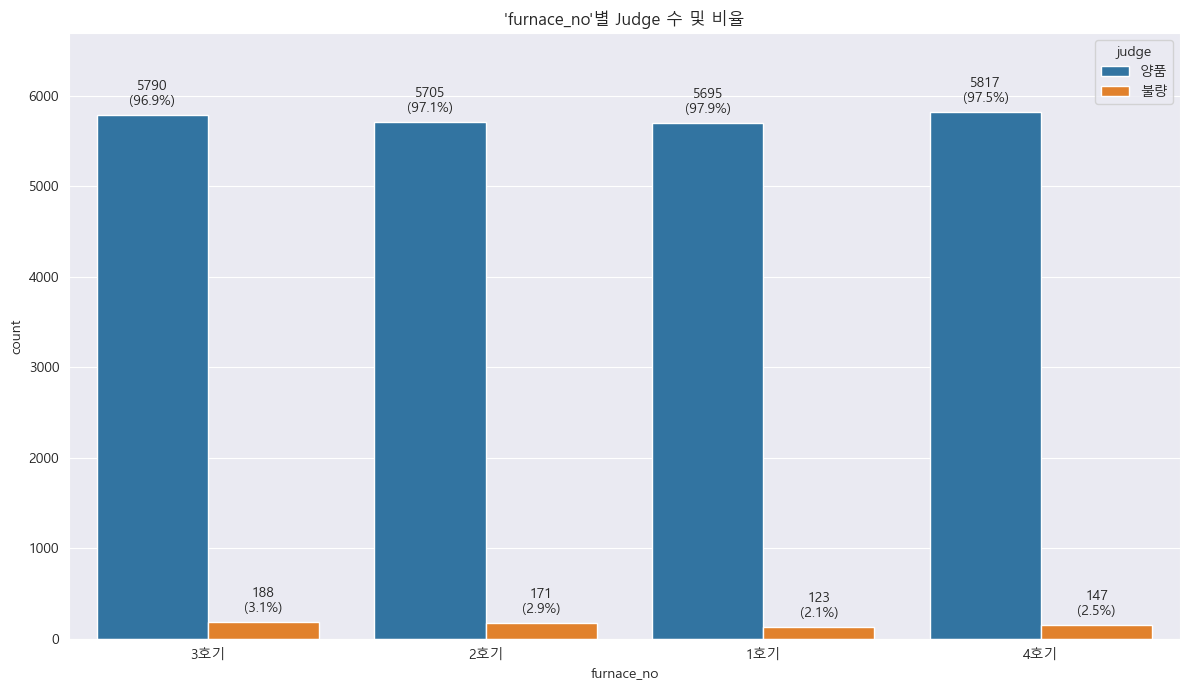

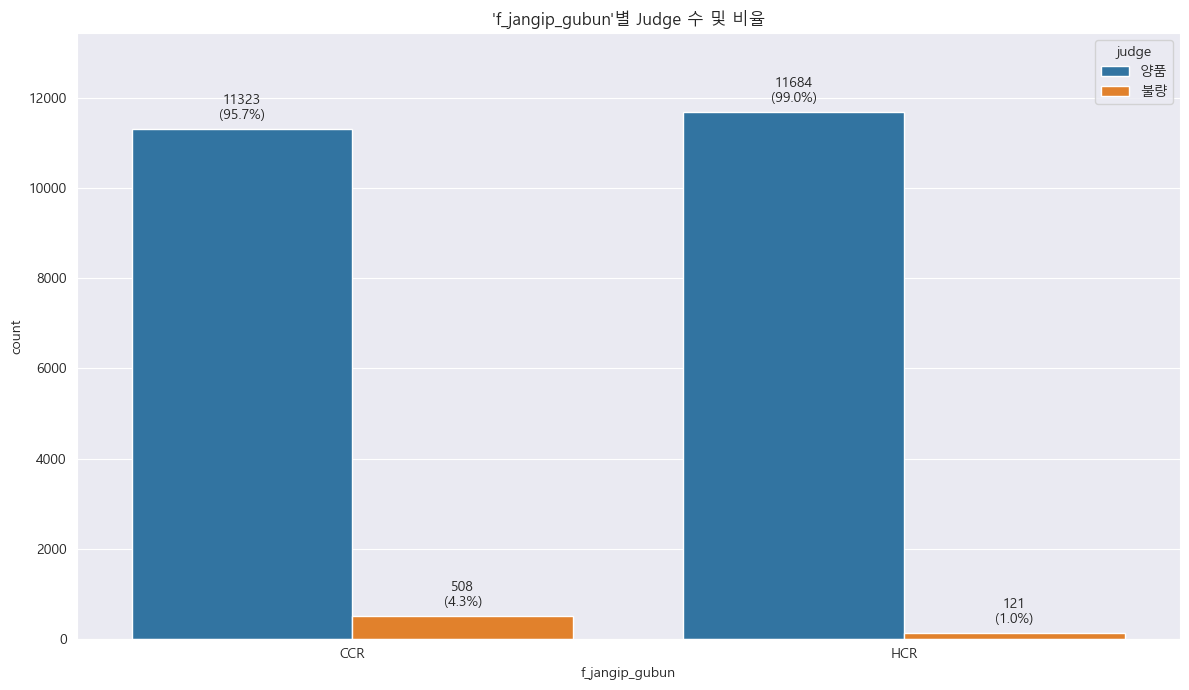

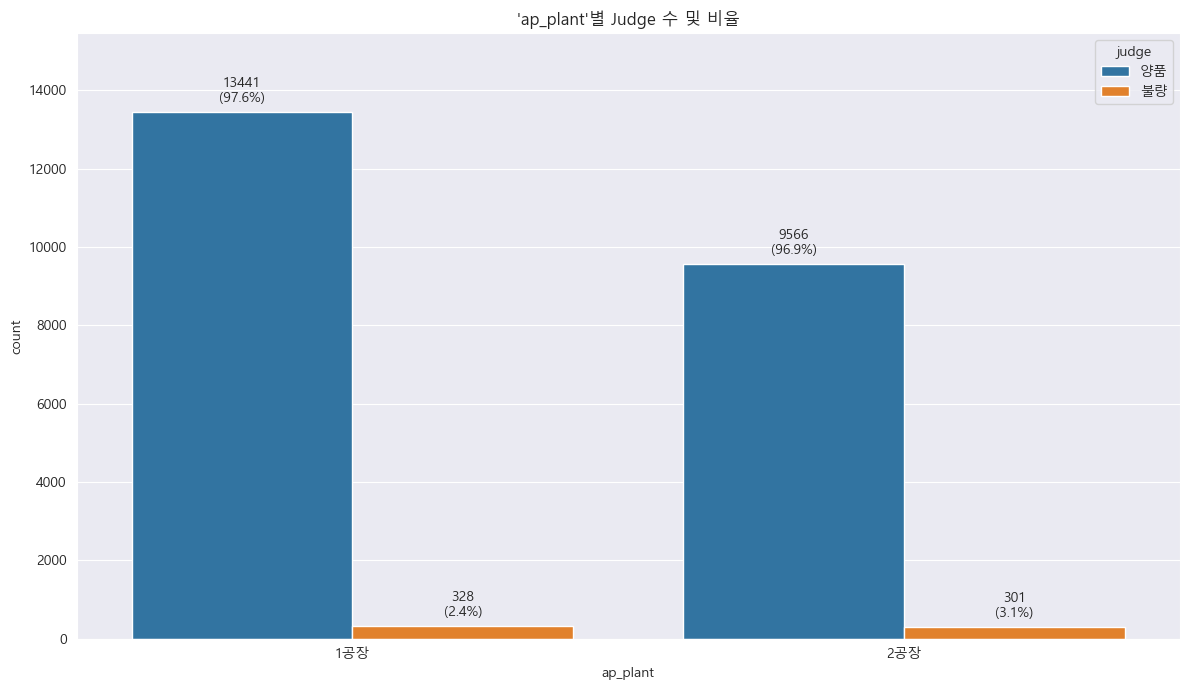

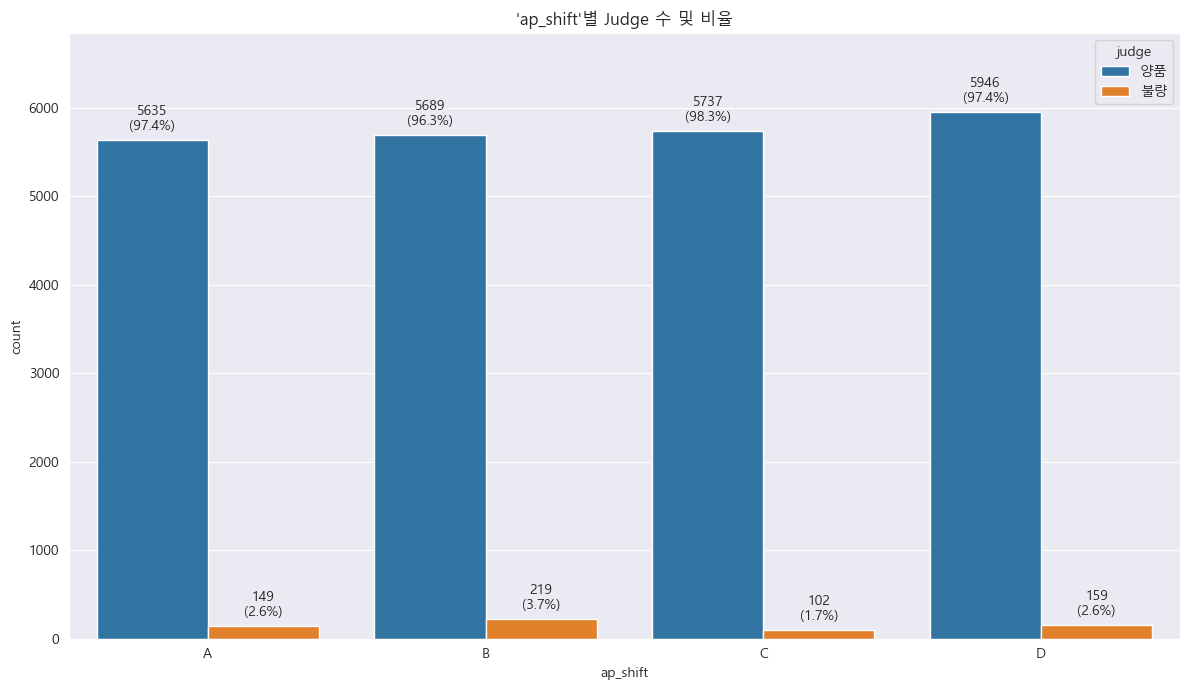

In [76]:
#범주형 그래프화
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
cat_vars = ['sm_plant', 'steel_usage', 'steel_grade', 'cc_gubun', 'slab_gubun', 'slab_grind','furnace_no','f_jangip_gubun','ap_plant','ap_shift']

for var in cat_vars:
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.countplot(x=var, hue='judge', data=df_raw, ax=ax)

    totals = df_raw[var].value_counts().to_dict()

    tick_positions = ax.get_xticks()
    tick_labels = [t.get_text() for t in ax.get_xticklabels()]
    pos_to_label = dict(zip(tick_positions, tick_labels))

    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        x_center = p.get_x() + p.get_width() / 2
        closest_tick = min(tick_positions, key=lambda t: abs(t - x_center))
        label = pos_to_label[closest_tick]
        total = totals.get(label, 1)
        percent = (height / total) * 100

        ax.annotate(
            f"{int(height)}\n({percent:.1f}%)",
            (x_center, height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points')
    ax.margins(y=0.15)
    plt.title(f"'{var}'별 Judge 수 및 비율")
    plt.tight_layout()
    plt.show()





### delta_ferrite KDE 비교 분석

교차점 3개:
  - 6.2079
  - 7.0992
  - 8.0994


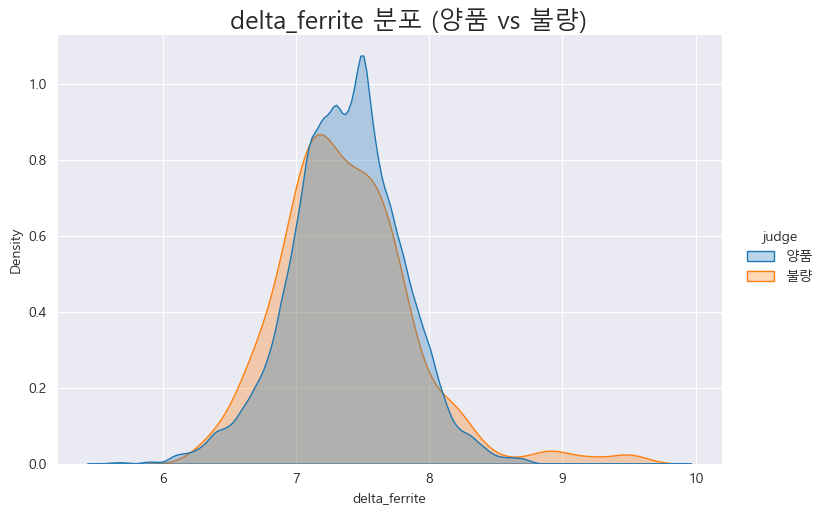



### ingre_cr KDE 비교 분석

교차점 5개:
  - 18.0237
  - 18.1866
  - 18.2423
  - 18.3300
  - 18.5943


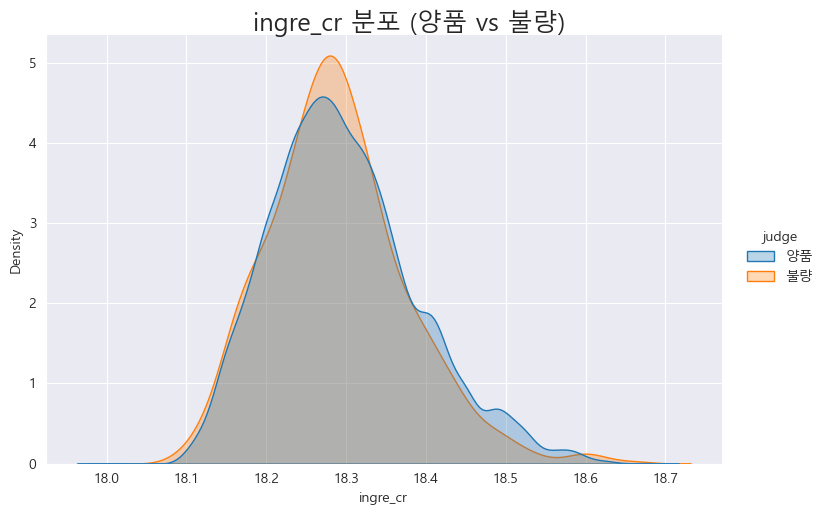



### ingre_ni KDE 비교 분석

교차점 4개:
  - 8.1376
  - 8.2605
  - 8.5393
  - 8.6326


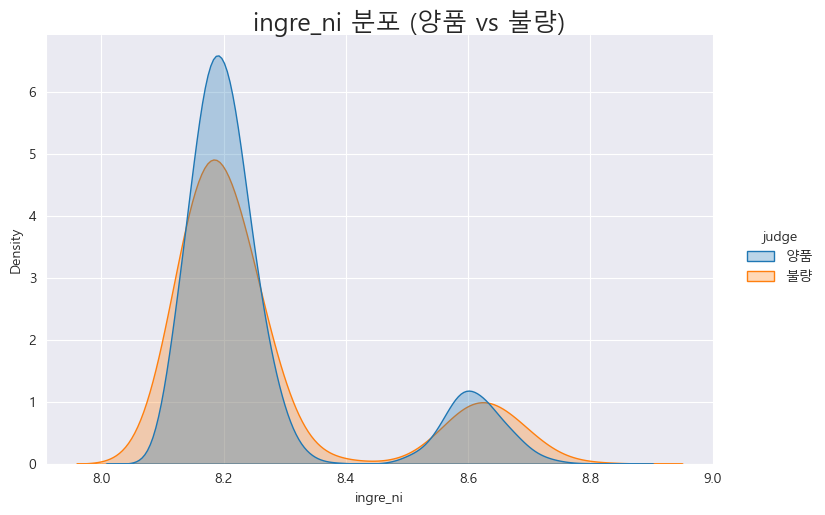



### ingre_s KDE 비교 분석

교차점 15개:
  - 0.0117
  - 0.0175
  - 0.0225
  - 0.0278
  - 0.0325
  - 0.0379
  - 0.0425
  - 0.0477
  - 0.0528
  - 0.0580
  - 0.0624
  - 0.0681
  - 0.0722
  - 0.0786
  - 0.0814


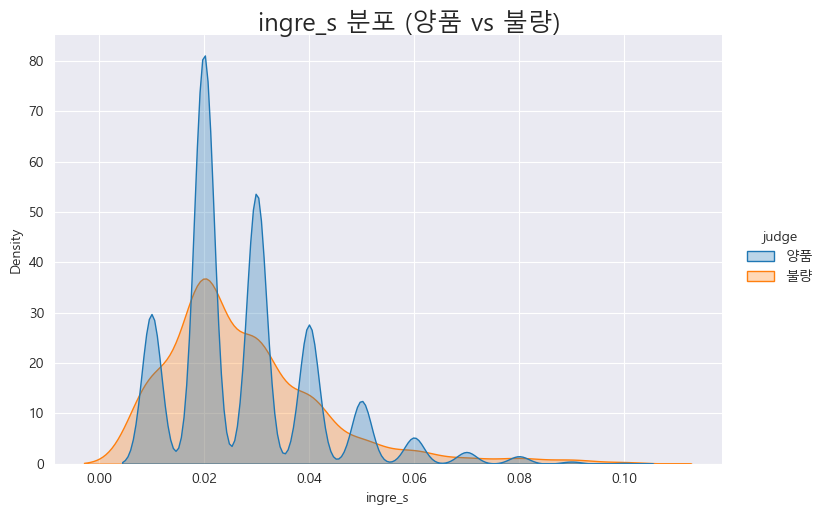



### f_jangip_temp KDE 비교 분석

교차점 1개:
  - 203.7354


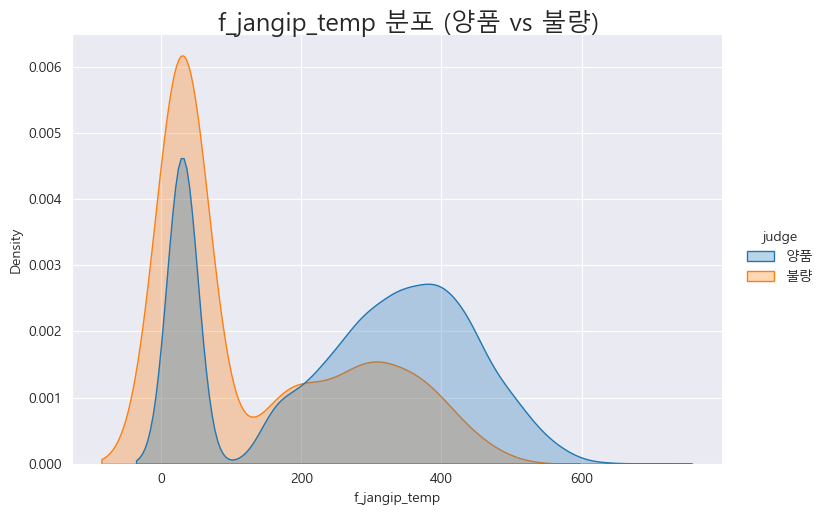



### f_sock_temp KDE 비교 분석

교차점 11개:
  - 1232.1755
  - 1237.7923
  - 1241.3597
  - 1243.4325
  - 1245.3316
  - 1247.6684
  - 1251.0560
  - 1253.6103
  - 1255.8473
  - 1257.8773
  - 1260.9704


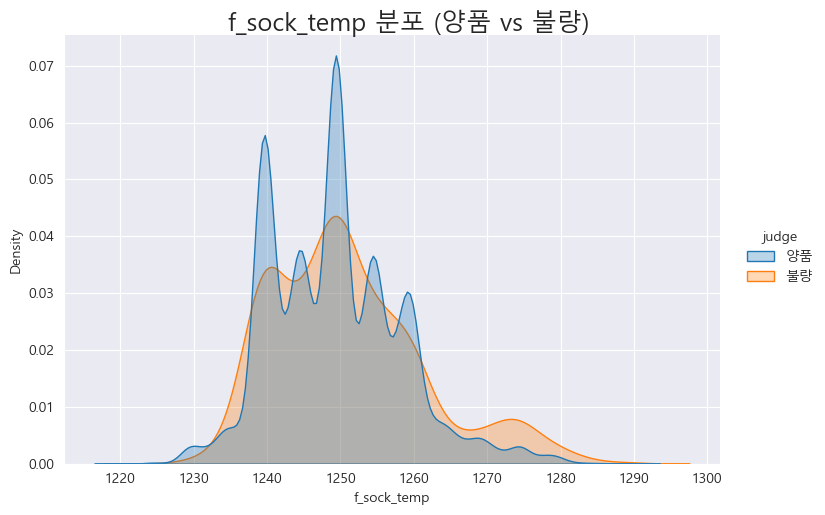



### f_ldg KDE 비교 분석

교차점 6개:
  - 0.9489
  - 4.5360
  - 5.5401
  - 13.1567
  - 17.5583
  - 23.6570


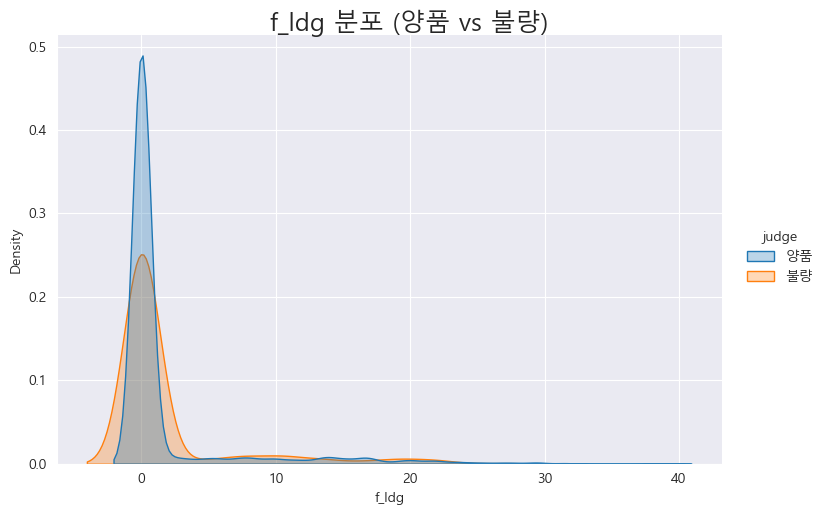



### f_ldg_per KDE 비교 분석

교차점 4개:
  - 1.6584
  - 20.7785
  - 29.0156
  - 44.8376


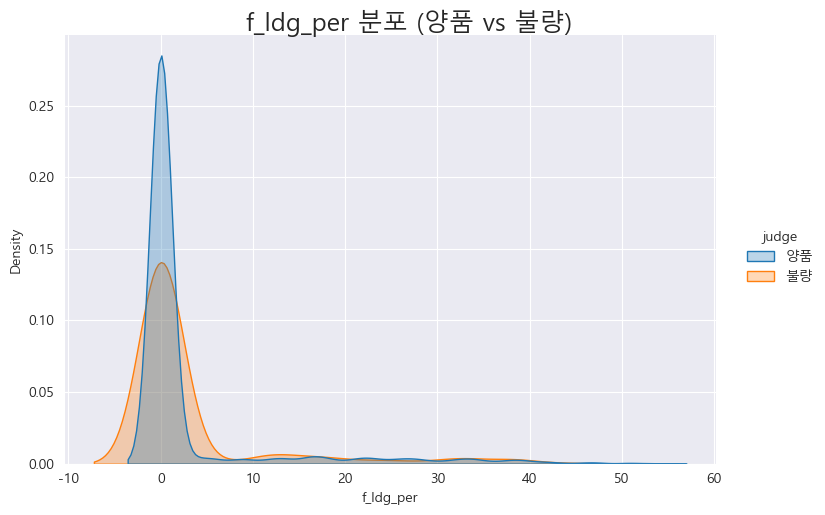



### hr_thick KDE 비교 분석

교차점 9개:
  - 3.2023
  - 3.5318
  - 3.6064
  - 3.9388
  - 4.1719
  - 4.9496
  - 5.1437
  - 5.8793
  - 5.9818


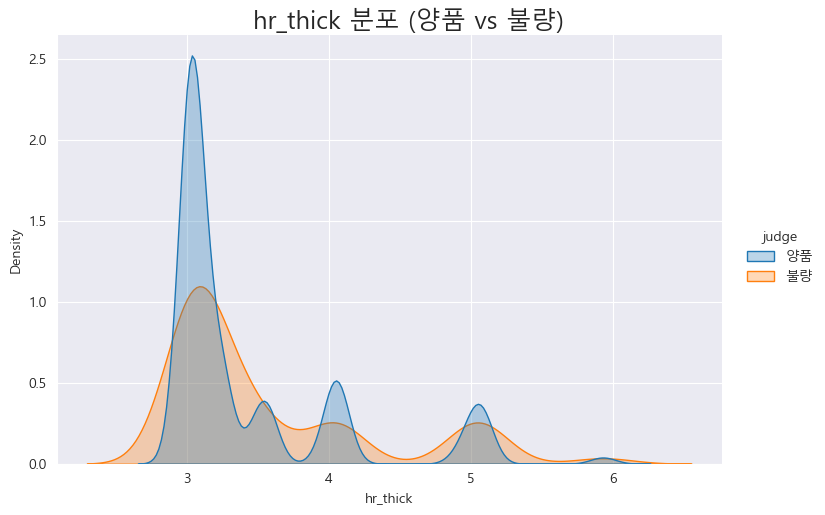



### rm4_temp KDE 비교 분석

교차점 3개:
  - 1070.5403
  - 1096.2598
  - 1122.9812


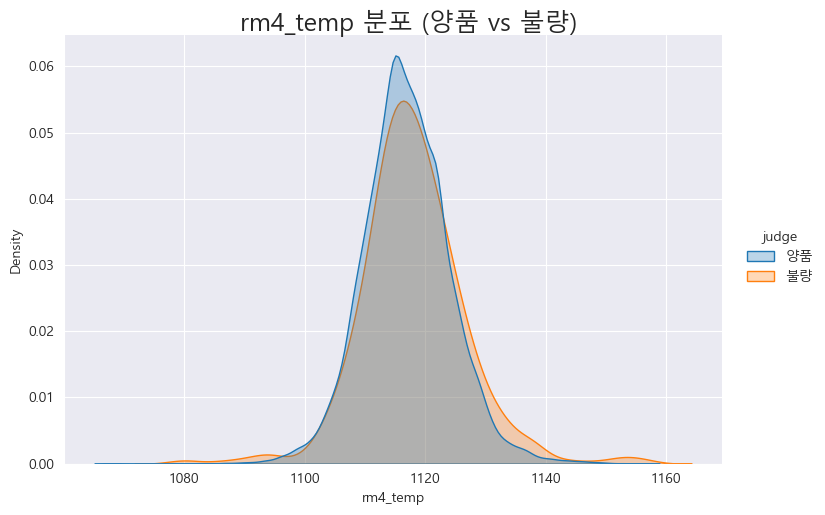



### ap_shift KDE 비교 분석

데이터 부족으로 ap_shift 분석 불가 (양품 0개 / 불량 0개)


### ap_thick KDE 비교 분석

교차점 10개:
  - 2.7755
  - 3.0832
  - 3.4123
  - 3.4409
  - 3.7801
  - 4.0130
  - 4.7785
  - 4.9674
  - 5.7033
  - 5.7765


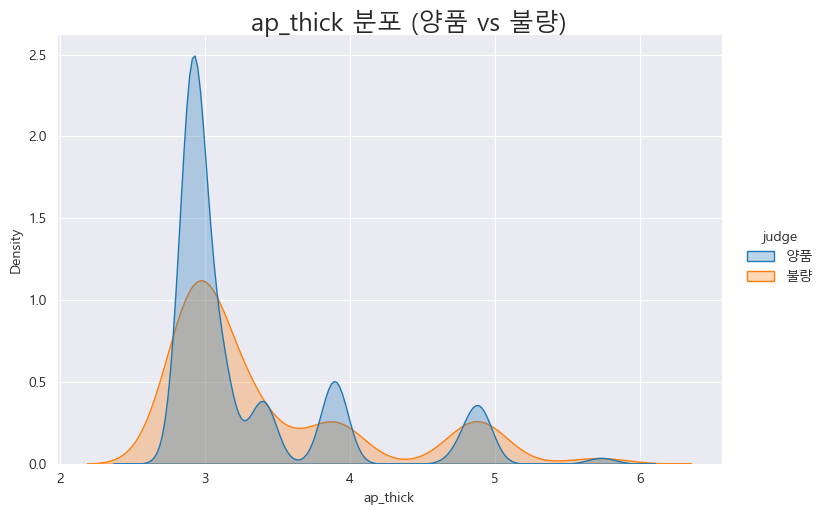



### ap_line_speed KDE 비교 분석

교차점 6개:
  - 6.4292
  - 26.8060
  - 28.2055
  - 41.6787
  - 44.5375
  - 47.8994


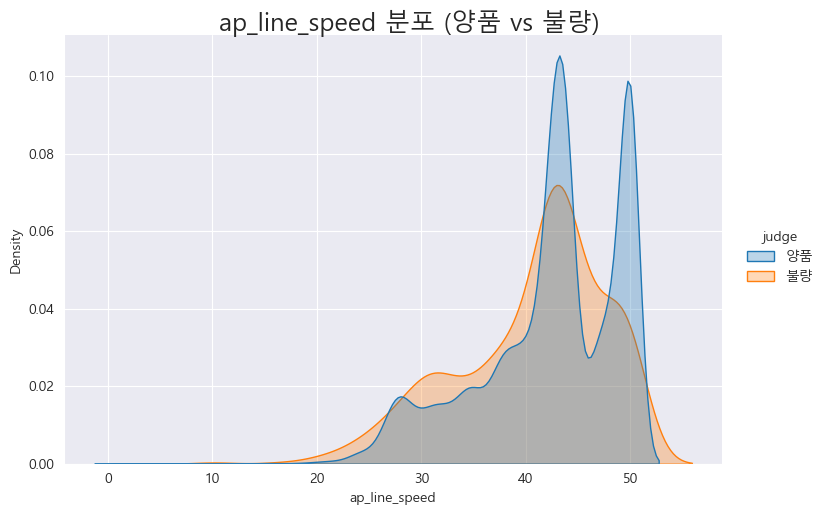



### date_diff1 KDE 비교 분석

교차점 6개:
  - 3.1840
  - 60.5572
  - 66.2416
  - 75.9143
  - 76.0696
  - 113.2476


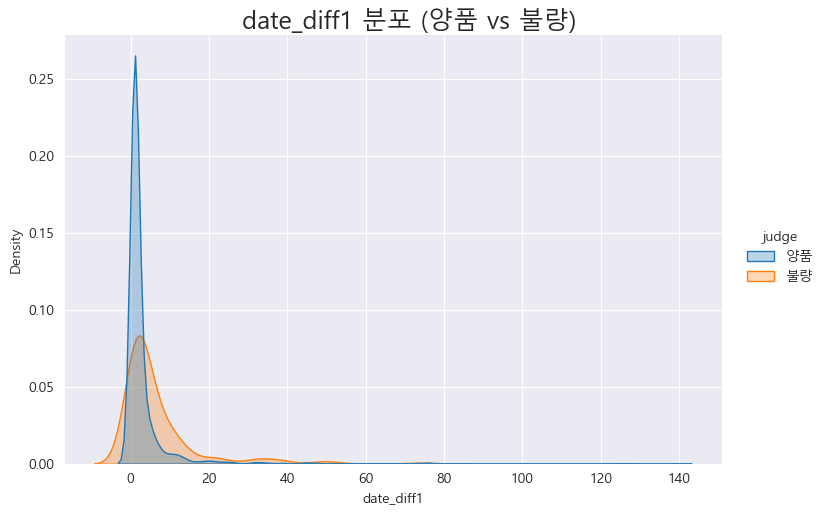



### date_diff2 KDE 비교 분석

교차점 11개:
  - 2.2600
  - 8.9600
  - 39.8521
  - 42.6270
  - 65.0911
  - 70.0264
  - 90.1558
  - 94.5923
  - 102.8234
  - 106.5265
  - 127.6656


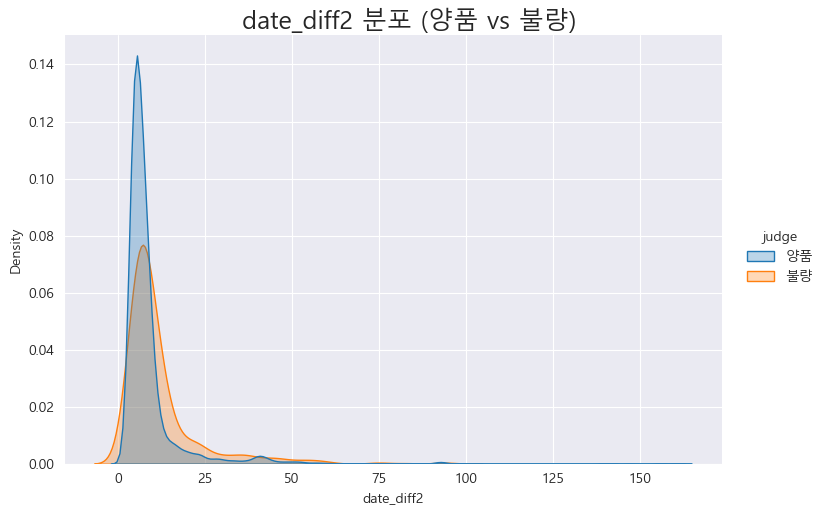



### date_diff3 KDE 비교 분석

교차점 7개:
  - 3.6039
  - 6.7583
  - 11.4246
  - 13.3957
  - 14.8798
  - 23.2632
  - 26.1736


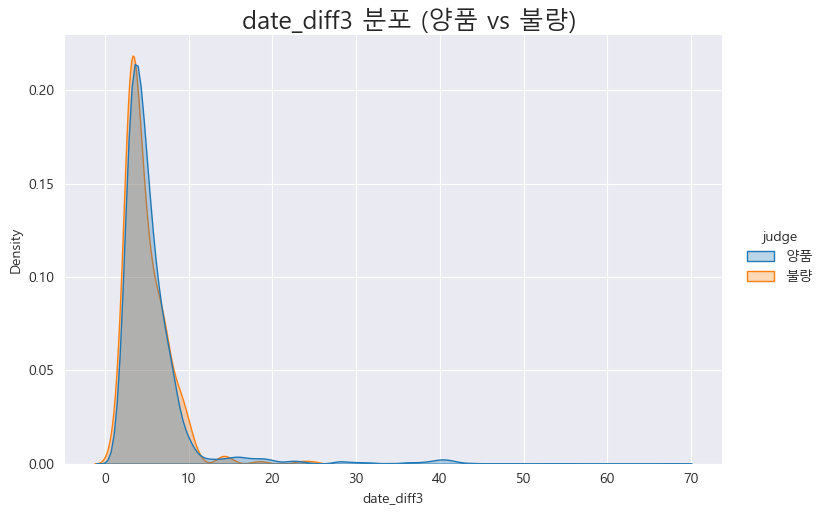



### f_sock_interval KDE 비교 분석

교차점 5개:
  - 32.9371
  - 44.0744
  - 55.6788
  - 56.6290
  - 102.0175


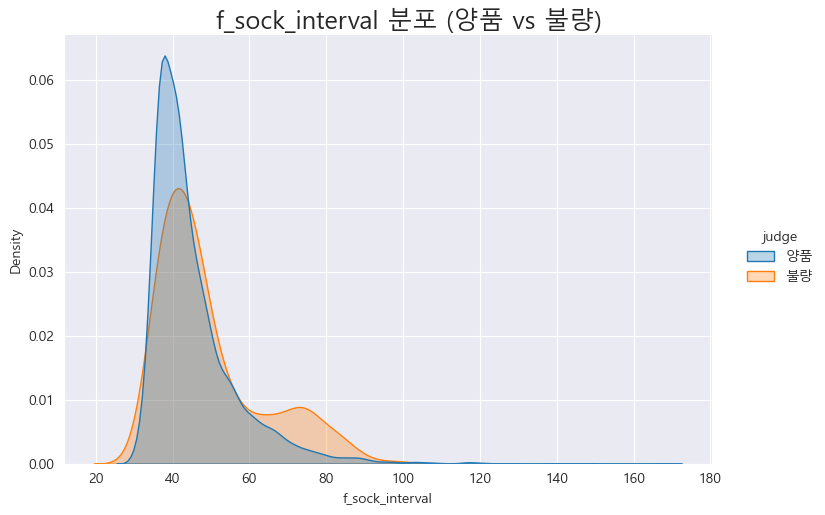



### f_heat_interval KDE 비교 분석

교차점 6개:
  - 42.7448
  - 60.3182
  - 126.2584
  - 135.9291
  - 160.9974
  - 167.0175


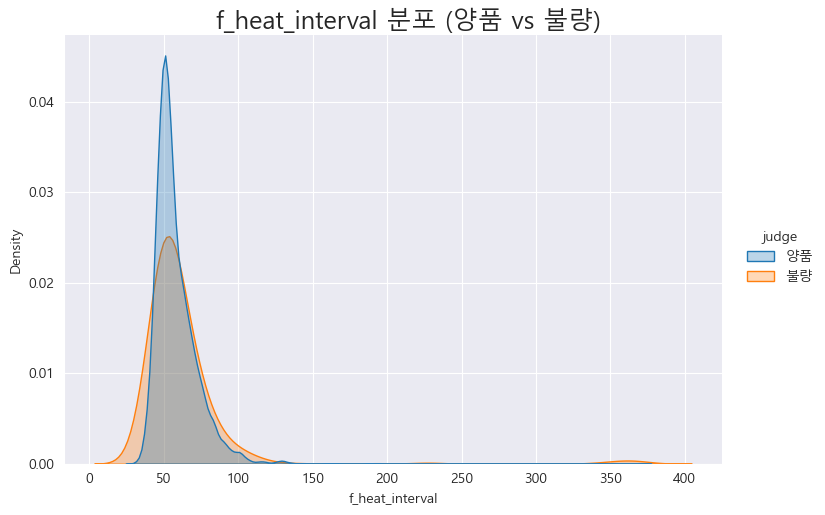



### f_pre_interval KDE 비교 분석

교차점 6개:
  - 67.3890
  - 101.5489
  - 153.5109
  - 164.3932
  - 171.9338
  - 192.6839


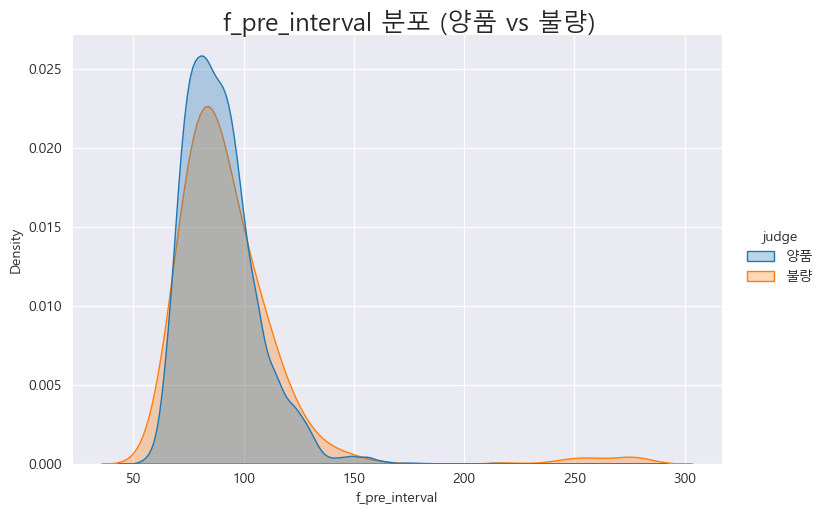



### dT_pre_heat KDE 비교 분석

교차점 7개:
  - 87.4157
  - 92.0061
  - 118.7435
  - 121.2079
  - 146.5094
  - 172.8217
  - 214.1403


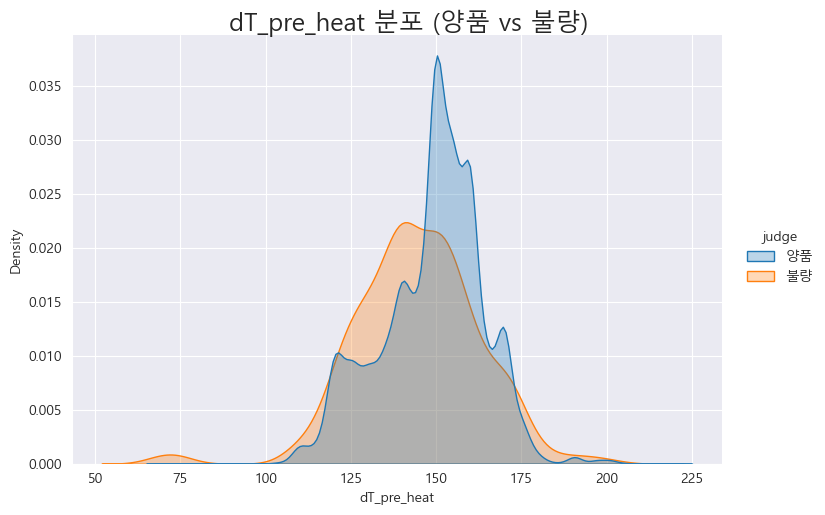



### dT_heat_sock KDE 비교 분석

교차점 13개:
  - -12.5946
  - -12.0464
  - -8.8618
  - -6.2072
  - -4.0438
  - -1.4523
  - 1.5454
  - 4.2650
  - 6.3200
  - 9.5333
  - 11.0513
  - 33.6678
  - 35.6528


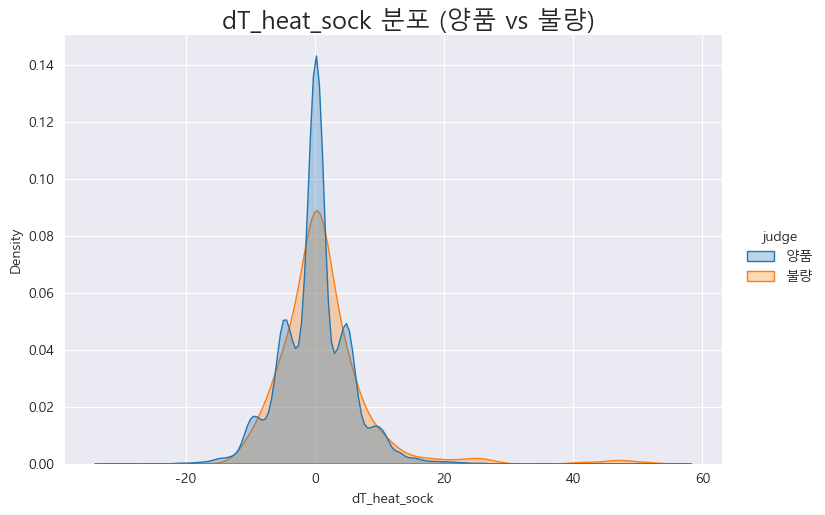



### dT_pre_sock KDE 비교 분석

교차점 6개:
  - 92.2415
  - 143.6154
  - 170.4924
  - 201.5508
  - 203.7667
  - 211.1025


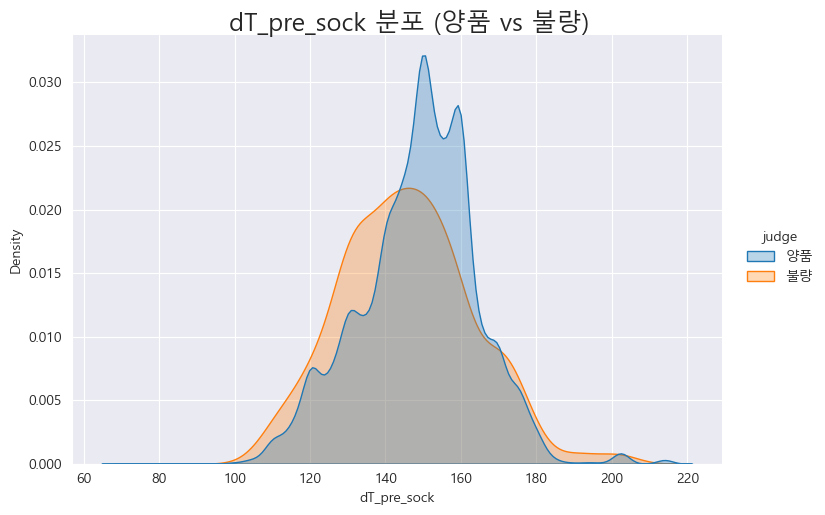



### total_interval KDE 비교 분석

교차점 2개:
  - 167.6068
  - 205.6789


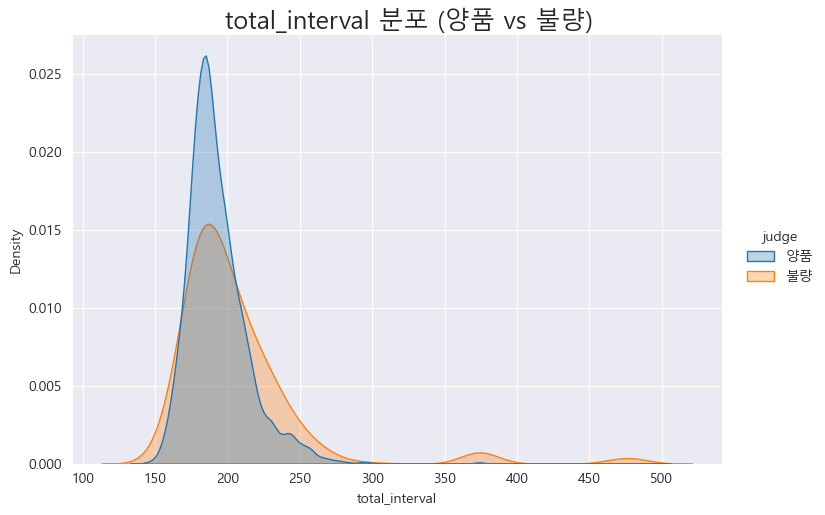

In [77]:
# 분석할 연속형 변수 리스트
from scipy.stats import gaussian_kde
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
cont_vars = [
    'delta_ferrite', 'ingre_cr', 'ingre_ni', 'ingre_s', 'f_jangip_temp','f_sock_temp',
    'f_ldg', 'f_ldg_per', 'hr_thick', 'rm4_temp', 'ap_shift', 'ap_thick',
    'ap_line_speed', 'date_diff1', 'date_diff2', 'date_diff3','f_sock_interval','f_heat_interval','f_pre_interval',
    'dT_pre_heat', 'dT_heat_sock', 'dT_pre_sock', 'total_interval'
]

JUDGE_VAR = 'judge'
GOOD_STR = '양품'
DEFECT_STR = '불량'

for TARGET_VAR in cont_vars:

    print(f"\n\n==============================")
    print(f"### {TARGET_VAR} KDE 비교 분석")
    print("==============================\n")

    df_filtered = df_raw.copy()

    # 해당 변수 numeric 변환
    df_filtered[TARGET_VAR] = pd.to_numeric(df_filtered[TARGET_VAR], errors='coerce')

    # 양품/불량 분리
    good_data = df_filtered[df_filtered[JUDGE_VAR] == GOOD_STR][TARGET_VAR].dropna()
    defect_data = df_filtered[df_filtered[JUDGE_VAR] == DEFECT_STR][TARGET_VAR].dropna()

    # sample이 너무 적으면 스킵
    if len(good_data) < 2 or len(defect_data) < 2:
        print(f"데이터 부족으로 {TARGET_VAR} 분석 불가 (양품 {len(good_data)}개 / 불량 {len(defect_data)}개)")
        continue

    # KDE 생성
    kde_good = gaussian_kde(good_data)
    kde_defect = gaussian_kde(defect_data)

    # 데이터 범위
    min_x = df_filtered[TARGET_VAR].min()
    max_x = df_filtered[TARGET_VAR].max()
    x_grid = np.linspace(min_x, max_x, 2000)

    diff = kde_good(x_grid) - kde_defect(x_grid)
    idx = np.where(np.sign(diff[:-1]) != np.sign(diff[1:]))[0]

    intersections = []
    for i in idx:
        x0, x1 = x_grid[i], x_grid[i+1]
        y0, y1 = diff[i], diff[i+1]
        root = x0 - y0 * (x1 - x0) / (y1 - y0)
        intersections.append(root)

    print(f"교차점 {len(intersections)}개:")
    for xval in intersections:
        print(f"  - {xval:.4f}")

    # 시각화
    g = sns.displot(
        data=df_filtered,
        x=TARGET_VAR,
        hue=JUDGE_VAR,
        kind='kde',
        fill=True,
        alpha=0.3,
        common_norm=False,
        height=5,
        aspect=1.5
    )

    g.fig.suptitle(
        f"{TARGET_VAR} 분포 (양품 vs 불량)",
        fontsize=18, y=1.02
    )

    plt.show()

### 도메인 개념 및 그래프 확인 후 vital few 탐색
### 최적 조건 도출 및 해당 조건 불량률 확인

--- f_jangip_temp (200 기준) 불량률 비교 ---
judge   group     양품   불량    총개수       불량률
0      200 이하   7278  428   7706  0.055541
1      200 초과  15729  201  15930  0.012618


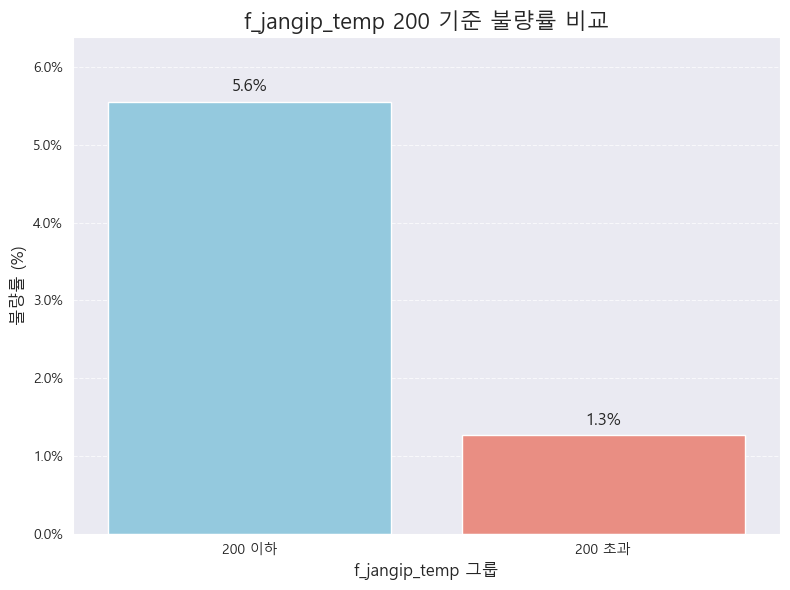

In [88]:
import matplotlib.ticker as mticker
TARGET_VAR = 'f_jangip_temp'
THRESHOLD = 200
JUDGE_VAR = 'judge'
print(f"--- {TARGET_VAR} ({THRESHOLD} 기준) 불량률 비교 ---")
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과'
)
# 데이터 준비
cross_table = pd.crosstab(df_raw['group'], df_raw[JUDGE_VAR])
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과'
)
# '양품', '불량' 정렬
cross_table_sorted = cross_table[['양품', '불량']]
cross_table_sorted['총개수'] = cross_table_sorted.sum(axis=1)
cross_table_sorted['불량률'] = (cross_table_sorted['불량'] / cross_table_sorted['총개수'])
df_agg = cross_table_sorted.reset_index()
print(df_agg)
# 시각화 Bar Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_agg,
    x='group',
    y='불량률',
    palette=['skyblue', 'salmon']
)
#  그래프 꾸미기
plt.title(f'{TARGET_VAR} {THRESHOLD} 기준 불량률 비교', fontsize=16)
plt.xlabel(f'{TARGET_VAR} 그룹', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.margins(y=0.15)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12
    )

plt.tight_layout()
plt.show()


--- f_sock_interval (70 기준) 불량률 비교 ---
judge  group     양품   불량    총개수       불량률
0      70 이하  22099  548  22647  0.024197
1      70 초과    908   81    989  0.081901


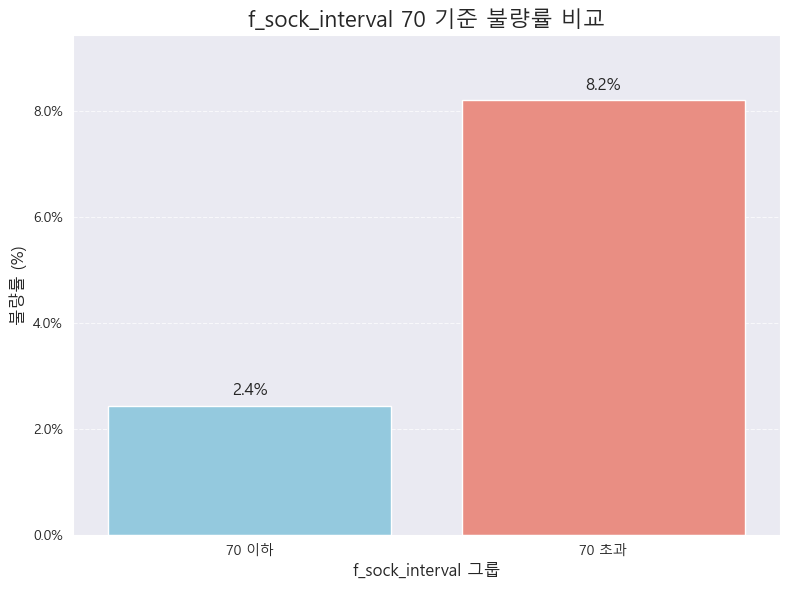

In [79]:
]'TARGET_VAR = 'f_sock_interval'
THRESHOLD = 70
JUDGE_VAR = 'judge'
print(f"--- {TARGET_VAR} ({THRESHOLD} 기준) 불량률 비교 ---")
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과'
)
# 데이터 준비
cross_table = pd.crosstab(df_raw['group'], df_raw[JUDGE_VAR])
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과'
)
# '양품', '불량'  정렬
cross_table_sorted = cross_table[['양품', '불량']]
cross_table_sorted['총개수'] = cross_table_sorted.sum(axis=1)
cross_table_sorted['불량률'] = (cross_table_sorted['불량'] / cross_table_sorted['총개수'])
df_agg = cross_table_sorted.reset_index()
print(df_agg)
# 시각화 Bar Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_agg,
    x='group',
    y='불량률',
    palette=['skyblue', 'salmon']
)
# 그래프
plt.title(f'{TARGET_VAR} {THRESHOLD} 기준 불량률 비교', fontsize=16)
plt.xlabel(f'{TARGET_VAR} 그룹', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.margins(y=0.15)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12
    )

plt.tight_layout()
plt.show()

--- date_diff1 (3 기준) 불량률 비교 ---
judge group     양품   불량    총개수       불량률
0      3 이하  19010  345  19355  0.017825
1      3 초과   3997  284   4281  0.066340


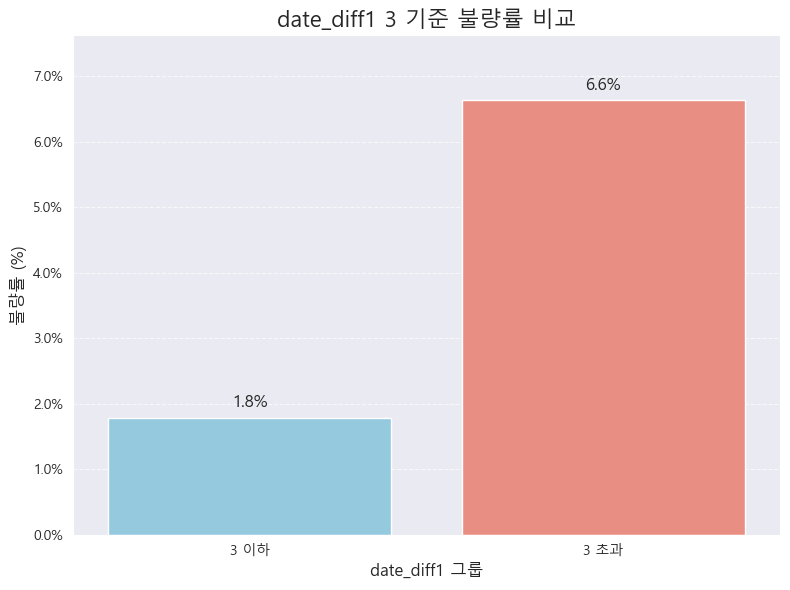

In [80]:
TARGET_VAR = 'date_diff1'
THRESHOLD = 3
JUDGE_VAR = 'judge'
print(f"--- {TARGET_VAR} ({THRESHOLD} 기준) 불량률 비교 ---")
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과'
)
# 데이터 준비
cross_table = pd.crosstab(df_raw['group'], df_raw[JUDGE_VAR])
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과'
)
# '양품', '불량' 정렬
cross_table_sorted = cross_table[['양품', '불량']]
cross_table_sorted['총개수'] = cross_table_sorted.sum(axis=1)
cross_table_sorted['불량률'] = (cross_table_sorted['불량'] / cross_table_sorted['총개수'])
df_agg = cross_table_sorted.reset_index()
print(df_agg)
# 시각화 Bar Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_agg,
    x='group',
    y='불량률',
    palette=['skyblue', 'salmon']
)
# 그래프
plt.title(f'{TARGET_VAR} {THRESHOLD} 기준 불량률 비교', fontsize=16)
plt.xlabel(f'{TARGET_VAR} 그룹', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.margins(y=0.15)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12)
plt.tight_layout()
plt.show()

--- f_ldg (12.33초과 ~ 19.17이하 vs 그 외) 불량률 비교 ---
judge            group     양품   불량    총개수       불량률
0      12.33초과~19.17이하    886   20    906  0.022075
1                  그 외  22121  609  22730  0.026793


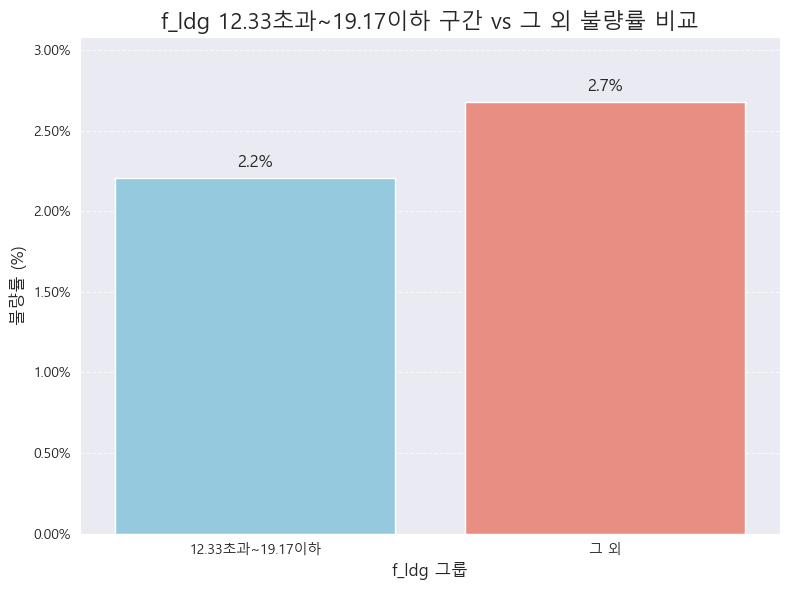

In [81]:
TARGET_VAR = 'f_ldg'
LOWER = 12.33    # 초과
UPPER = 19.17    # 이하
JUDGE_VAR = 'judge'
print(f"--- {TARGET_VAR} ({LOWER}초과 ~ {UPPER}이하 vs 그 외) 불량률 비교 ---")
#  데이터 준비
df_raw[TARGET_VAR] = pd.to_numeric(df_raw[TARGET_VAR], errors='coerce')
df_raw['group'] = np.where(
    (df_raw[TARGET_VAR] > LOWER) & (df_raw[TARGET_VAR] <= UPPER),
    f'{LOWER}초과~{UPPER}이하',
    '그 외'
)
cross_table = pd.crosstab(df_raw['group'], df_raw[JUDGE_VAR])

# '양품', '불량'  정렬
for col in ['양품', '불량']:
    if col not in cross_table.columns:
        cross_table[col] = 0
cross_table_sorted = cross_table[['양품', '불량']]
cross_table_sorted['총개수'] = cross_table_sorted.sum(axis=1)
cross_table_sorted['불량률'] = (
    cross_table_sorted['불량'] / cross_table_sorted['총개수'])
df_agg = cross_table_sorted.reset_index()
print(df_agg)
# 시각화Bar Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_agg,
    x='group',
    y='불량률',
    palette=['skyblue', 'salmon']
)
# 그래프
plt.title(f'{TARGET_VAR} {LOWER}초과~{UPPER}이하 구간 vs 그 외 불량률 비교', fontsize=16)
plt.xlabel(f'{TARGET_VAR} 그룹', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.margins(y=0.15)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12
    )
plt.tight_layout()
plt.show()

--- delta_ferrite (8.5 기준) 불량률 비교 ---
judge   group     양품   불량    총개수       불량률
0      8.5 이하  22914  612  23526  0.026014
1      8.5 초과     93   17    110  0.154545


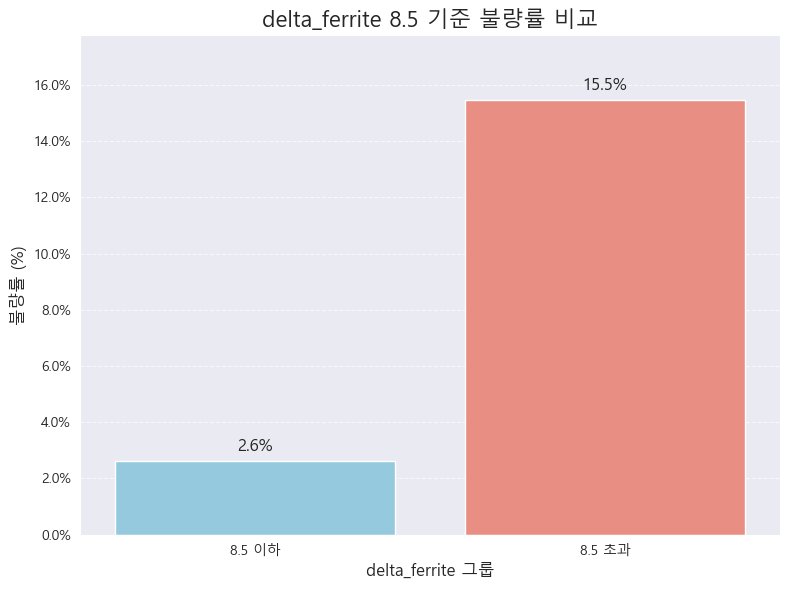

In [82]:
TARGET_VAR = 'delta_ferrite'
THRESHOLD = 8.5
JUDGE_VAR = 'judge'
print(f"--- {TARGET_VAR} ({THRESHOLD} 기준) 불량률 비교 ---")
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과'
)
# 데이터 준비
cross_table = pd.crosstab(df_raw['group'], df_raw[JUDGE_VAR])
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과')
# '양품', '불량' 정렬
cross_table_sorted = cross_table[['양품', '불량']]
cross_table_sorted['총개수'] = cross_table_sorted.sum(axis=1)
cross_table_sorted['불량률'] = (cross_table_sorted['불량'] / cross_table_sorted['총개수'])
df_agg = cross_table_sorted.reset_index()
print(df_agg)
# 시각화 Bar Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_agg,
    x='group',
    y='불량률',
    palette=['skyblue', 'salmon']
)
# 그래프
plt.title(f'{TARGET_VAR} {THRESHOLD} 기준 불량률 비교', fontsize=16)
plt.xlabel(f'{TARGET_VAR} 그룹', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.margins(y=0.15)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12
    )
plt.tight_layout()
plt.show()

--- ingre_s (0.08 기준) 불량률 비교 ---
judge    group     양품   불량    총개수       불량률
0      0.08 이하  22943  622  23565  0.026395
1      0.08 초과     64    7     71  0.098592


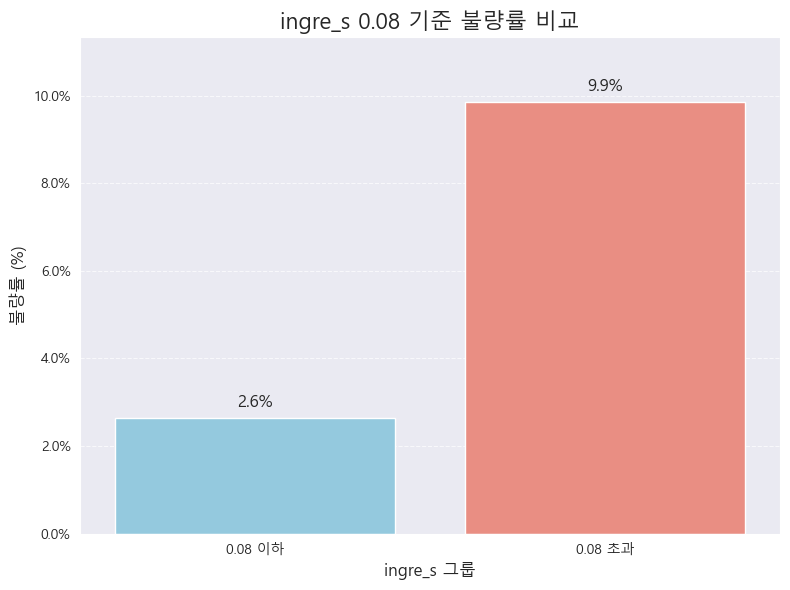

In [83]:
TARGET_VAR = 'ingre_s'
THRESHOLD = 0.08
JUDGE_VAR = 'judge'
print(f"--- {TARGET_VAR} ({THRESHOLD} 기준) 불량률 비교 ---")
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과')
# 데이터 준비
cross_table = pd.crosstab(df_raw['group'], df_raw[JUDGE_VAR])
df_raw['group'] = np.where(
    df_raw[TARGET_VAR] <= THRESHOLD,
    f'{THRESHOLD} 이하',
    f'{THRESHOLD} 초과')
# '양품', '불량' 정렬
cross_table_sorted = cross_table[['양품', '불량']]
cross_table_sorted['총개수'] = cross_table_sorted.sum(axis=1)
cross_table_sorted['불량률'] = (cross_table_sorted['불량'] / cross_table_sorted['총개수'])
df_agg = cross_table_sorted.reset_index()
print(df_agg)
# 시각화 Bar Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=df_agg,
    x='group',
    y='불량률',
    palette=['skyblue', 'salmon']
)
# 그래프
plt.title(f'{TARGET_VAR} {THRESHOLD} 기준 불량률 비교', fontsize=16)
plt.xlabel(f'{TARGET_VAR} 그룹', fontsize=12)
plt.ylabel('불량률 (%)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
ax.margins(y=0.15)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.1%}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12)
plt.tight_layout()
plt.show()

In [84]:
#최적의 vital few 조건 만족하는 불량률 확인
JUDGE_VAR = 'judge'
GOOD_STR = '양품'
DEFECT_STR = '불량'
print(f"--- 원본 데이터 vs ' 최적 vital few 조건 만족' 불량률 비교 ---")
# 원본데이터
total_count_orig = len(df_raw)
defect_count_orig = (df_raw[JUDGE_VAR] == DEFECT_STR).sum()
defect_rate_orig = (defect_count_orig / total_count_orig) * 100
print(f"\n[ 1. 원본 df_raw (Before) ]")
print(f"  - 총 개수: {total_count_orig}")
print(f"  - 불량 개수: {defect_count_orig}")
print(f"  - 원본 불량률: {defect_rate_orig:.2f} %")


# 최적 조건 나열 및 적용
condition_1 = (df_raw['ingre_s'] <= 0.08)
condition_2 = (df_raw['date_diff1'] <= 3)
condition_3 = (df_raw['delta_ferrite'] <= 8.5)
condition_4 = (df_raw['f_sock_interval'] <= 70)
condition_5 = (df_raw['f_jangip_temp'] >= 200)
filter_mask = condition_1 & condition_2 & condition_3 & condition_4 & condition_5
df_filtered_adj = df_raw[filter_mask]
total_count_adj = len(df_filtered_adj)
defect_count_adj = (df_filtered_adj[JUDGE_VAR] == DEFECT_STR).sum()
defect_rate_adj = 0.0
if total_count_adj > 0:
    defect_rate_adj = (defect_count_adj / total_count_adj) * 100
# 시각화
print(f"\n[ 2. '최적 조건 만족' (After) ]")
print(f"  - (조건 만족 데이터 총 {total_count_adj}개 발견)")
print(f"  - 불량 개수: {defect_count_adj}")
print(f"  - 조건 불량률: {defect_rate_adj:.2f} %")

--- 원본 데이터 vs ' 최적 vital few 조건 만족' 불량률 비교 ---

[ 1. 원본 df_raw (Before) ]
  - 총 개수: 23636
  - 불량 개수: 629
  - 원본 불량률: 2.66 %

[ 2. '최적 조건 만족' (After) ]
  - (조건 만족 데이터 총 15236개 발견)
  - 불량 개수: 166
  - 조건 불량률: 1.09 %


불량률이 높은 조건 ; steel_usage == RZ6, f_jangip_gubun == CCR

In [85]:
# --- 1. 변수 설정 ---
JUDGE_VAR = 'judge'
GOOD_STR = '양품'
DEFECT_STR = '불량'

# --- 2. 'CCR' 원본 불량률 계산 ---
print("\n--- 1. 'RZ6' 원본 불량률 계산 ---")

# 'CCR' 데이터 필터링
df_ccr = df_raw[df_raw['steel_usage'] == 'RZ6']

# 'CCR' 양품/불량 빈도 계산
ccr_good_count = (df_ccr[JUDGE_VAR] == GOOD_STR).sum()
ccr_defect_count = (df_ccr[JUDGE_VAR] == DEFECT_STR).sum()

# 'CCR' 총 개수 및 불량률 계산
ccr_total_count = ccr_good_count + ccr_defect_count
ccr_defect_rate = 0.0
if ccr_total_count > 0:
    ccr_defect_rate = (ccr_defect_count / ccr_total_count) * 100

print(f"  - 'RZ6' 총 개수: {ccr_total_count} 개")
print(f"  - 'RZ6' 불량률: {ccr_defect_rate:.2f} %")


# --- 3. 'RZ6' 최적 조건 필터링 및 계산 (기존 코드) ---
print(f"\n--- 2. 'RZ6' 최적 조건 필터링 ---")

# RZ6 제작 간 최적조건
range_conditions = {
    'date_diff1': (0, 2),
    'dT_pre_heat': (143, 171),
    'total_interval': (165, 200),
    'dT_pre_sock': (142, 168)}



# 기본 조건 (RZ6)
filter_mask = (df_raw['steel_usage'] == 'RZ6')

# Range 조건 (>=, <=)을 마스크에 추가
for col, (min_val, max_val) in range_conditions.items():
    filter_mask &= (df_raw[col] >= min_val) & (df_raw[col] <= max_val)

# --- 4. 최종 필터링 및 계산 (RZ6) ---
df_filtered_rz6 = df_raw[filter_mask]
print(f"  - (모든 조건을 만족하는 'RZ6' 데이터 총 {len(df_filtered_rz6)}개 발견)")

# 양품/불량 빈도 계산
rz6_opt_good_count = (df_filtered_rz6[JUDGE_VAR] == GOOD_STR).sum()
rz6_opt_defect_count = (df_filtered_rz6[JUDGE_VAR] == DEFECT_STR).sum()

# 총 개수 및 불량률 계산
rz6_opt_total_count = rz6_opt_good_count + rz6_opt_defect_count
rz6_opt_defect_rate = 0.0
if rz6_opt_total_count > 0:
    rz6_opt_defect_rate = (rz6_opt_defect_count / rz6_opt_total_count) * 100

print(f"  - 'RZ6' 최적 조건 양품: {rz6_opt_good_count} 개")
print(f"  - 'RZ6' 최적 조건 불량: {rz6_opt_defect_count} 개")
print(f"  - 'RZ6' 최적 조건 총 개수: {rz6_opt_total_count} 개")
print(f"  - 'RZ6' 최적 조건 불량률: {rz6_opt_defect_rate:.2f} %")


# --- 5. 최종 비교 ---
print("\n--- 📈 최종 비교 ---")
print(f"  - 'RZ6' 원본 불량률: {ccr_defect_rate:.2f} %")
print(f"  - 'RZ6' 최적 조건 불량률: {rz6_opt_defect_rate:.2f} %")


--- 1. 'RZ6' 원본 불량률 계산 ---
  - 'RZ6' 총 개수: 846 개
  - 'RZ6' 불량률: 8.87 %

--- 2. 'RZ6' 최적 조건 필터링 ---
  - (모든 조건을 만족하는 'RZ6' 데이터 총 306개 발견)
  - 'RZ6' 최적 조건 양품: 300 개
  - 'RZ6' 최적 조건 불량: 6 개
  - 'RZ6' 최적 조건 총 개수: 306 개
  - 'RZ6' 최적 조건 불량률: 1.96 %

--- 📈 최종 비교 ---
  - 'RZ6' 원본 불량률: 8.87 %
  - 'RZ6' 최적 조건 불량률: 1.96 %



=== ap_shift별 RZ6 제작 빈도 ===
ap_shift
A    171
B    296
C    216
D    163
Name: count, dtype: int64


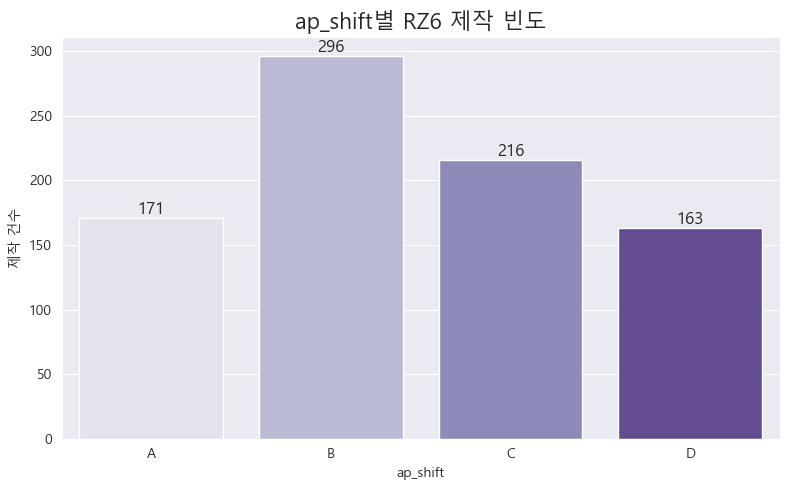

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) RZ6만 필터링
df_rz6 = df_raw[df_raw['steel_usage'] == 'RZ6'].copy()

# 2) ap_shift별 제작 빈도 집계
shift_counts = df_rz6['ap_shift'].value_counts().sort_index()

print("\n=== ap_shift별 RZ6 제작 빈도 ===")
print(shift_counts)

# 3) 시각화
plt.figure(figsize=(8,5))
sns.barplot(x=shift_counts.index, y=shift_counts.values, palette="Purples")

plt.title("ap_shift별 RZ6 제작 빈도", fontsize=16)
plt.xlabel("ap_shift")
plt.ylabel("제작 건수")

# 바 위에 숫자 표시
for i, v in enumerate(shift_counts.values):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [87]:
df_raw.to_csv("합본.csv", index=False, encoding="utf-8-sig")

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import imblearn
import matplotlib
import xgboost

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("sklearn:", sklearn.__version__)
print("imblearn:", imblearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("xgboost:", xgboost.__version__)